In [104]:
import numpy as np
import os
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import csv
import pandas as pd
import matplotlib.ticker as plticker
from matplotlib import colors

# Step 1. Load the data

* **`RPPA:`** Reverse-Phase Protein Array, representing the gene-(signaling) protein expression data
* **`GCP:`** Global Chromatin Profiling, quantifying the post-translational modifications on histone proteins

In [2]:
rppa_file = os.path.join('dataset/rppa/','****.xlsx')
gcppbs_file = os.path.join('dataset/rppa/','****.xlsx')

# rppa_sheet = pd.read_csv(rppa_file).drop('antibody', axis=1).set_index('Gene')
# rppa_sheet.columns = [c.split('_')[0]+'_'+c.split('_')[1] for c in rppa_sheet.columns]
# # print(rppa_sheet.keys())
# rppa_sheet
rppa_sheets = pd.read_excel(rppa_file, sheet_name=None)
rppa_sheet = rppa_sheets['MDD_RPPA_Level3_annotated'].set_index('Protein')
rppa_sheet

,Ctrl_1_C1_A,Ctrl_1_C1_B,Ctrl_1_C1_C,Ctrl_4_C1_A,Ctrl_4_C1_B,Ctrl_4_C1_C,Ctrl_8_C1_A,Ctrl_8_C1_B,Ctrl_8_C1_C,Ctrl_24_C1_A,...,EGF_4_C1_C,EGF_8_C1_A,EGF_8_C1_B,EGF_8_C1_C,EGF_24_C1_A,EGF_24_C1_B,EGF_24_C1_C,EGF_48_C1_A,EGF_48_C1_B,EGF_48_C1_C
Protein,,,,,,,,,,,,,,,,,,,,,
ABL1,0.000310,0.031685,-0.055298,0.051052,0.026680,-0.021996,0.021755,-0.005544,-0.024761,-0.047121,...,-0.087755,-0.020787,-0.107387,-0.120227,-0.103292,-0.150854,-0.113138,-0.021530,-0.015754,-0.135435
ACACApS79,0.069518,-0.020398,-0.093938,-0.055590,-0.098645,-0.272289,-0.077084,0.019222,-0.281157,0.045707,...,-0.073930,0.005993,0.039189,0.024400,0.028183,0.173964,0.088723,0.113537,0.247388,0.101702
ACACA,-0.264707,-0.265937,-0.302433,-0.506396,-0.674463,-0.918469,-0.661592,-0.653774,-0.852282,-0.548505,...,-0.498349,-0.505849,-0.257069,-0.364185,-0.428440,-0.332328,-0.152577,0.074101,0.286594,0.029798
ACTB,-0.118066,-0.022769,-0.085344,-0.099919,0.063704,-0.122041,-0.154931,-0.067040,-0.165731,-0.338587,...,-0.028344,-0.085220,0.024031,-0.056720,-0.079659,0.085222,-0.107853,0.139159,0.016584,-0.155145
ADAR,-0.099450,-0.220497,-0.000719,-0.052901,-0.113386,-0.145133,-0.154334,-0.130278,0.112978,-0.094341,...,-0.186506,-0.043701,-0.172779,0.057116,-0.000566,0.363417,0.428583,0.150507,0.218137,0.619550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAP1,0.126525,0.469130,0.512731,0.049638,0.288480,0.677562,0.448915,0.278702,0.266965,0.797129,...,0.151334,0.091401,-0.093945,0.036093,-0.116469,-0.336443,-0.550910,-0.779015,-1.248974,-1.233488
YBX1pS102,-0.432223,-0.424690,-0.881142,-0.540705,-0.580833,-0.616678,-0.431430,-0.377594,-0.501575,-0.744400,...,0.201669,0.346718,0.340233,0.255079,0.269912,0.376047,0.348544,0.219888,0.153807,0.234803
YWHAB,0.061919,0.164463,0.139105,0.062465,0.169988,0.102759,0.077519,0.114281,0.050505,0.010207,...,-0.053050,-0.030945,0.011141,-0.018970,-0.083856,0.007409,-0.174587,-0.214546,-0.162499,-0.215125


In [3]:
# remove insignificant proteins (p>=0.05)
# rppa_p005_file = os.path.join('data','rppa_p005.xlsx')
# rppa_p005 = pd.read_excel(rppa_p005_file, sheet_name='Sheet1').set_index('Protein')

rppa_p005_file = os.path.join('dataset/tumour_microenv_results_2020-9/rppa/','pval_005_rppa.xlsx')
rppa_p005 = pd.read_excel(rppa_p005_file, sheet_name='Sheet1').set_index('Protein')
rppa_p005

,p
Protein,
RPA2pS4S8,4.886948e-02
CHEK2,4.607508e-02
ERCC1,4.395053e-02
RPS6KA1,4.314620e-02
BID,4.235510e-02
...,...
HIF1A,9.166431e-07
DUSP4,7.442644e-07
CCNB1,4.328352e-07


In [4]:
rppa_file = os.path.join('dataset/rppa/','MDD_RPPA_Level3_preprocessed_2020-9.xlsx')
rppa_sheets = pd.read_excel(rppa_file, sheet_name=None)
rppa_sheet = rppa_sheets['MDD_RPPA_Level3_annotated'].set_index('Protein')
rppa_sheet.columns = [c.split('_')[0]+'_'+c.split('_')[1] for c in rppa_sheet.columns]

rppa_p005_file = os.path.join('dataset/tumour_microenv_results_2020-9/rppa/','pval_005_rppa.xlsx')
rppa_p005 = pd.read_excel(rppa_p005_file, sheet_name='Sheet1').set_index('Protein')

sig_proteins = rppa_p005.index
rppa_sheet = rppa_sheet[rppa_sheet.index.isin(sig_proteins)]
rppa_sheet

,Ctrl_1,Ctrl_1,Ctrl_1,Ctrl_4,Ctrl_4,Ctrl_4,Ctrl_8,Ctrl_8,Ctrl_8,Ctrl_24,...,EGF_4,EGF_8,EGF_8,EGF_8,EGF_24,EGF_24,EGF_24,EGF_48,EGF_48,EGF_48
Protein,,,,,,,,,,,,,,,,,,,,,
ACACApS79,0.069518,-0.020398,-0.093938,-0.055590,-0.098645,-0.272289,-0.077084,0.019222,-0.281157,0.045707,...,-0.073930,0.005993,0.039189,0.024400,0.028183,0.173964,0.088723,0.113537,0.247388,0.101702
ACACA,-0.264707,-0.265937,-0.302433,-0.506396,-0.674463,-0.918469,-0.661592,-0.653774,-0.852282,-0.548505,...,-0.498349,-0.505849,-0.257069,-0.364185,-0.428440,-0.332328,-0.152577,0.074101,0.286594,0.029798
ACTB,-0.118066,-0.022769,-0.085344,-0.099919,0.063704,-0.122041,-0.154931,-0.067040,-0.165731,-0.338587,...,-0.028344,-0.085220,0.024031,-0.056720,-0.079659,0.085222,-0.107853,0.139159,0.016584,-0.155145
ADAR,-0.099450,-0.220497,-0.000719,-0.052901,-0.113386,-0.145133,-0.154334,-0.130278,0.112978,-0.094341,...,-0.186506,-0.043701,-0.172779,0.057116,-0.000566,0.363417,0.428583,0.150507,0.218137,0.619550
AIM1,-0.121296,-0.065828,-0.061636,0.022980,-0.000757,-0.054192,-0.060577,-0.065081,-0.060935,-0.351726,...,0.002874,0.043931,0.001903,0.013054,0.147682,0.072050,0.162921,0.108015,0.018869,0.052094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAP1,0.126525,0.469130,0.512731,0.049638,0.288480,0.677562,0.448915,0.278702,0.266965,0.797129,...,0.151334,0.091401,-0.093945,0.036093,-0.116469,-0.336443,-0.550910,-0.779015,-1.248974,-1.233488
YBX1pS102,-0.432223,-0.424690,-0.881142,-0.540705,-0.580833,-0.616678,-0.431430,-0.377594,-0.501575,-0.744400,...,0.201669,0.346718,0.340233,0.255079,0.269912,0.376047,0.348544,0.219888,0.153807,0.234803
YWHAB,0.061919,0.164463,0.139105,0.062465,0.169988,0.102759,0.077519,0.114281,0.050505,0.010207,...,-0.053050,-0.030945,0.011141,-0.018970,-0.083856,0.007409,-0.174587,-0.214546,-0.162499,-0.215125


In [5]:
rppa_sheet = rppa_sheet.apply(pd.to_numeric, errors='ignore')

rppa_averaged = rppa_sheet.groupby(rppa_sheet.columns, axis=1, sort=False).mean()
rppa_averaged = rppa_averaged[rppa_averaged.columns[~rppa_averaged.columns.str.endswith('_1')]]
rppa_averaged

,Ctrl_4,Ctrl_8,Ctrl_24,Ctrl_48,BMP2_4,BMP2_8,BMP2_24,BMP2_48,IFNG_4,IFNG_8,...,HGF_24,HGF_48,OSM_4,OSM_8,OSM_24,OSM_48,EGF_4,EGF_8,EGF_24,EGF_48
Protein,,,,,,,,,,,,,,,,,,,,,
ACACApS79,-0.142175,-0.113006,0.134518,-0.039729,-0.064886,-0.057137,0.113238,0.088875,-0.079851,0.058141,...,0.181315,0.193398,-0.624484,-0.038890,0.126776,0.124391,0.010657,0.023194,0.096957,0.154209
ACACA,-0.699776,-0.722549,-0.415850,-0.335162,-0.066088,-0.041917,0.271822,0.261609,0.112509,0.078456,...,-0.022620,0.097078,-0.157995,-0.365247,-0.089365,-0.201320,-0.398932,-0.375701,-0.304448,0.130164
ACTB,-0.052752,-0.129234,-0.262818,-0.414436,0.025325,0.056454,0.169959,0.256429,0.072412,0.152106,...,-0.081691,0.017452,0.040291,0.080555,0.097897,-0.072785,-0.020946,-0.039303,-0.034097,0.000199
ADAR,-0.103806,-0.057212,0.065246,-0.321926,-0.103748,-0.026020,0.203358,0.417079,-0.123841,-0.071567,...,0.229156,0.359912,-0.158395,0.010882,0.239280,0.463670,-0.166048,-0.053121,0.263812,0.329398
AIM1,-0.010656,-0.062198,-0.483361,-0.380001,-0.004422,0.070170,-0.170334,-0.091978,0.033117,0.083728,...,-0.136851,-0.378746,0.046287,0.105904,-0.016676,-0.347914,0.014943,0.019630,0.127551,0.059660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAP1,0.338560,0.331527,0.560180,0.946066,0.182622,-0.010110,-0.312291,-0.847871,0.078657,0.012855,...,-0.245952,-0.546247,0.096528,0.102677,-0.419462,-0.690891,0.134526,0.011183,-0.334607,-1.087159
YBX1pS102,-0.579405,-0.436866,-0.835522,-0.799565,0.166153,0.197230,0.205932,0.044790,0.441147,0.510485,...,-0.238072,-0.468781,-0.004765,0.003751,0.074680,-0.457236,0.200917,0.314010,0.331501,0.202833
YWHAB,0.111738,0.080769,0.078832,0.169886,-0.007424,-0.042659,-0.073689,-0.121088,0.002308,0.003419,...,-0.055743,-0.080233,-0.028986,-0.066034,-0.094968,-0.095026,0.016194,-0.012925,-0.083678,-0.197390


# Step 2. Data Processing (RPPA data)

* 1) Combine multiple simialr/same colums or rows as one and to fold change 
* 2) Normalize the data - zscore normalization: df_zscore = (df - df.mean())/df.std()
* 3) Organize data of multiple time points as a 3-way tensor

In [6]:
rppa_sheet = rppa_sheet.apply(pd.to_numeric, errors='ignore')

rppa_averaged = rppa_sheet.groupby(rppa_sheet.columns, axis=1, sort=False).mean()
rppa_averaged = rppa_averaged[rppa_averaged.columns[~rppa_averaged.columns.str.endswith('_1')]]

rppa_averaged= rppa_averaged[['Ctrl_4', 'Ctrl_8', 'Ctrl_24', 'Ctrl_48', 
               'EGF_4', 'EGF_8', 'EGF_24', 'EGF_48',
               'HGF_4', 'HGF_8', 'HGF_24', 'HGF_48', 
               'OSM_4', 'OSM_8','OSM_24', 'OSM_48', 
               'BMP2_4','BMP2_8', 'BMP2_24', 'BMP2_48', 
               'IFNG_4', 'IFNG_8', 'IFNG_24','IFNG_48', 
               'TGFB_4', 'TGFB_8', 'TGFB_24', 'TGFB_48'
               ]]

time_conditions=['_4','_8','_24','_48']

# rppa_averaged=rppa_averaged.apply(lambda x:x.columns, axis=1)

for time_condition in time_conditions:
    time_m=rppa_averaged.columns.str.endswith(time_condition)
    conditions=rppa_averaged.columns[time_m&(~rppa_averaged.columns.str.contains('Ctrl'))].unique()
    print (conditions)
    for condition in conditions:
        rppa_averaged[condition] = rppa_averaged[condition]-rppa_averaged['Ctrl'+time_condition]
    rppa_averaged=rppa_averaged.drop('Ctrl'+time_condition,axis=1)
    

rppa_averaged_binary = rppa_averaged.copy(deep=True)
rppa_averaged_binary[rppa_averaged_binary < 0] = -1
rppa_averaged_binary[rppa_averaged_binary >= 0] = 1
    
# rppa_averaged
# rppa_averaged = rppa_averaged.sub(rppa_averaged['ctrl_0'], axis=0).drop('ctrl_0',axis=1)
rppa_averaged = np.absolute(rppa_averaged)
# rppa_averaged = np.power(2, rppa_averaged)
protein_names = rppa_averaged.index
# tensor = rppa_averaged.to_numpy().reshape([275,6,5]).transpose([2, 0, 1])[1:,:,:]
tensor = rppa_averaged.to_numpy().reshape([rppa_averaged.shape[0],6,4]).transpose([2, 0, 1])
ligand_names = pd.Index([v.split('_')[0] for v in rppa_averaged.columns.to_numpy().reshape([6,4]).transpose([1,0])[0]])
print('Size of the RPPA tensor:',tensor.shape)
print(ligand_names)
rppa_averaged

Index(['EGF_4', 'HGF_4', 'OSM_4', 'BMP2_4', 'IFNG_4', 'TGFB_4'], dtype='object')
Index(['EGF_8', 'HGF_8', 'OSM_8', 'BMP2_8', 'IFNG_8', 'TGFB_8'], dtype='object')
Index(['EGF_24', 'HGF_24', 'OSM_24', 'BMP2_24', 'IFNG_24', 'TGFB_24'], dtype='object')
Index(['EGF_48', 'HGF_48', 'OSM_48', 'BMP2_48', 'IFNG_48', 'TGFB_48'], dtype='object')
Size of the RPPA tensor: (4, 274, 6)
Index(['EGF', 'HGF', 'OSM', 'BMP2', 'IFNG', 'TGFB'], dtype='object')


,EGF_4,EGF_8,EGF_24,EGF_48,HGF_4,HGF_8,HGF_24,HGF_48,OSM_4,OSM_8,...,BMP2_24,BMP2_48,IFNG_4,IFNG_8,IFNG_24,IFNG_48,TGFB_4,TGFB_8,TGFB_24,TGFB_48
Protein,,,,,,,,,,,,,,,,,,,,,
ACACApS79,0.152832,0.136200,0.037562,0.193938,0.199244,0.157221,0.046797,0.233127,0.482309,0.074117,...,0.021280,0.128604,0.062324,0.171148,0.380278,0.713289,0.080166,0.024917,0.236249,0.122431
ACACA,0.300844,0.346848,0.111401,0.465326,0.378279,0.400327,0.393230,0.432240,0.541781,0.357302,...,0.687672,0.596771,0.812284,0.801005,0.589558,0.562646,0.855471,0.812629,0.423138,0.740998
ACTB,0.031806,0.089931,0.228721,0.414635,0.012234,0.073282,0.181127,0.431888,0.093043,0.209789,...,0.432777,0.670866,0.125165,0.281339,0.462946,0.185483,0.153416,0.406118,0.894917,1.027210
ADAR,0.062241,0.004090,0.198566,0.651324,0.015708,0.071103,0.163910,0.681838,0.054589,0.068093,...,0.138112,0.739005,0.020035,0.014355,0.105648,0.686257,0.055798,0.060584,0.176686,0.897050
AIM1,0.025600,0.081827,0.610912,0.439661,0.053700,0.089997,0.346510,0.001256,0.056944,0.168102,...,0.313027,0.288023,0.043774,0.145926,0.534248,0.171259,0.089724,0.103882,0.220331,0.238782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAP1,0.204034,0.320344,0.894787,2.033225,0.208621,0.287992,0.806132,1.492314,0.242032,0.228851,...,0.872471,1.793938,0.259903,0.318673,0.924933,1.767933,0.221857,0.332257,0.857116,1.814121
YBX1pS102,0.780322,0.750876,1.167023,1.002398,0.317199,0.331333,0.597449,0.330785,0.574641,0.440617,...,1.041454,0.844355,1.020553,0.947352,1.360673,0.496940,0.863387,0.834913,1.193822,0.948001
YWHAB,0.095544,0.093693,0.162509,0.367276,0.102718,0.066244,0.134575,0.250118,0.140724,0.146803,...,0.152521,0.290974,0.109429,0.077350,0.238006,0.185260,0.110779,0.103499,0.099762,0.180218


In [7]:
rppa_averaged_binary

,EGF_4,EGF_8,EGF_24,EGF_48,HGF_4,HGF_8,HGF_24,HGF_48,OSM_4,OSM_8,...,BMP2_24,BMP2_48,IFNG_4,IFNG_8,IFNG_24,IFNG_48,TGFB_4,TGFB_8,TGFB_24,TGFB_48
Protein,,,,,,,,,,,,,,,,,,,,,
ACACApS79,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,...,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
ACACA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ADAR,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0
AIM1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAP1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
YBX1pS102,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
YWHAB,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


# Step 3. Tensor Decomposition (RPPA data)

tensor size: (274, 6, 4)


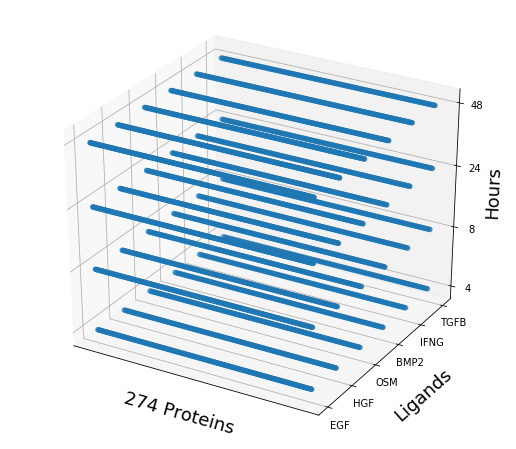

In [8]:
from mpl_toolkits.mplot3d import Axes3D

tensor_T = np.transpose(tensor,[1,2,0])
print('tensor size:',tensor_T.shape)
x,y,z = tensor_T.nonzero()
fig = plt.figure(figsize=(9,8))
fig.clf()
ax = fig.add_subplot(111, projection='3d')
ax.set_xticks([])
# ax.set_yticks([0,1,2,3,4,5])
# ax.set_zticks([0,1,2,3,4])
ax.set(yticks=range(tensor_T.shape[1]), yticklabels=ligand_names,
#        xticks=range(tensor_T.shape[0]), xticklabels=protein_names)
       zticks=range(tensor_T.shape[2]), zticklabels=['4','8','24','48']) 
ax.set_xlabel(str(tensor_T.shape[0])+' Proteins', fontsize=18)
ax.set_ylabel('Ligands', fontsize=18)
ax.yaxis.labelpad=15
ax.set_zlabel('Hours', fontsize=18)
c = (z<=0)
ax.scatter(x, y, z, cmap='cm.coolwarm')

## Find the best number of components with corcondia (Core Consistency Diagnostic, https://rdrr.io/cran/multiway/man/corcondia.html)

* A value of 100 indiciates a perfect multilinear structure, and smaller values indicate greater violations of multilinear structure.

## Calculating core consistency with R package 

In [9]:
from numpy.linalg import norm
def compute_namda(A, B, C):
    K = A.shape[1]
    namda = 1
    for r in range(K):
        A_r = A[:,r]
        B_r = B[:,r]
        C_r = C[:,r]
        namda *= norm(A_r)*norm(B_r)*norm(C_r)
    return namda

In [10]:
# Method1: rank the core consistency rigidly following Panisson's paper
def rank_(cc_values, namdas, k):
    top_50percent = int(len(cc_values)/2)
    top_idx = np.argsort(cc_values)[-top_50percent:]
    cc_values_selected = cc_values[top_idx]
    namdas_selected = namdas[top_idx]
    top_idx = np.argsort(namdas_selected)[-k:]
    return cc_values_selected[top_idx]

In [11]:
# Method 2: rank the core consistency with top-k returned
def rank_k(cc_values, namdas, k):
    top_50percent = int(len(cc_values)/2)
    top_idx = np.argsort(cc_values)[-k:]
    return cc_values[top_idx]

In [12]:
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
importr('multiway')
parafac = robjects.r["parafac"]
corcondia = robjects.r["corcondia"]
import tensorly as tl

iters = 100
num_k = 11
start = 2
cc_values = {}
cc_factors = {}
for i in range(iters):
    for k in range(start, num_k):
        pfac = parafac(tensor, nfac=k, nstart=1)
        A_f = np.array(pfac[pfac.names.index('A')])
        B_f = np.array(pfac[pfac.names.index('B')])
        C_f = np.array(pfac[pfac.names.index('C')])
        namda = compute_namda(A_f, B_f, C_f)
        if k not in cc_values.keys():
            cc_values[k] = [corcondia(tensor, pfac, divisor = ["core", "nfac"])[0]]
            cc_factors[k] = [namda]
        else:
            cc_values[k].append(corcondia(tensor, pfac, divisor = ["core", "nfac"])[0])
            cc_factors[k].append(namda)

In [13]:
import statistics 
top_k = 20
ys = []
ys_average = []
for k in range(start, num_k):
    ccvs = np.array(cc_values[k])
    ccfs = np.array(cc_factors[k])
    top_ccs = rank_k(ccvs, ccfs, top_k)
    ys.append(top_ccs)
    ys_average.append(statistics.mean(top_ccs))
    print(k, top_ccs)
ys = np.array(ys)

2 [79.34129223 79.47390365 80.47065154 81.76101151 84.56910064 84.84369302
 85.73567788 85.81459503 88.81499239 89.16639291 89.88995471 89.96285545
 90.84553922 93.30812559 96.21561727 96.28457677 97.58418068 97.72949618
 99.20468355 99.62733381]
3 [33.22825541 33.59721641 33.88225296 34.32716807 36.05744371 39.14108535
 39.81449655 44.38101867 44.43023779 45.05114142 46.48206172 48.03408218
 49.06315684 50.78489383 51.89054437 52.09781291 54.22017439 55.05982332
 56.98097702 62.51054502]
4 [ 8.31643193  8.97290962  9.0311941   9.48961087  9.52194613 10.04915899
 10.09480813 10.74962647 12.11029941 12.27112451 12.28634433 13.11654701
 13.34357867 13.82071832 14.27909354 16.16303769 17.87394451 20.07322205
 21.07184859 30.30111374]
5 [ 2.92037082  2.99197234  3.22612183  3.29822954  4.02172103  4.31705335
  4.35709439  4.65926531  4.74854549  4.78538258  4.79982104  4.84624982
  5.20244476  5.76915874  6.38477002  7.26601169  7.9175613   8.36162374
  9.03951421 10.37180229]
6 [0.3152455

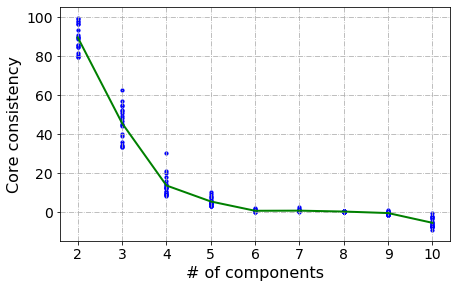

In [14]:
# xyz=np.array(np.random.random((100,3)))
# plt.scatter(xyz[1,:], xyz[1,:])
xs = np.array([list(range(start, num_k))] * top_k).T
xs_average = list(range(start, num_k))
# xs
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.scatter(xs, ys, 10, c='blue')

linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(xs_average, ys_average, color="green", **linestyle, fmt='-')

plt.xlabel("# of components", fontsize=16)
plt.ylabel("Core consistency", fontsize=16)
plt.grid(linestyle='-.')

In [15]:
pairs = pd.DataFrame([xs_average,ys_average])
# pairs = pairs.set_index(0).rename_axis(None)
# pairs.columns = [[''],['']]
print("Number of K vs. Core consistency")
pairs

Number of K vs. Core consistency


,0,1,2,3,4,5,6,7,8
0,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
1,89.532184,45.551719,13.646828,5.464236,0.692366,0.757843,0.297534,-0.475613,-5.482264


## none-negative tensor decomposition

## Based on above curve, we choose K=2

In [16]:
from sklearn.utils.validation import check_is_fitted, check_non_negative
from sklearn.utils.extmath import randomized_svd, safe_sparse_dot, squared_norm
from math import sqrt

def norm(x):
    """Dot product-based Euclidean norm implementation
    See: http://fseoane.net/blog/2011/computing-the-vector-norm/
    Parameters
    ----------
    x : array-like
        Vector for which to compute the norm
    """
    return sqrt(squared_norm(x))

def _initialize_nmf(X, n_components, init=None, eps=1e-26,
                    random_state=None):
    """Algorithms for NMF initialization.
    Computes an initial guess for the non-negative
    rank k matrix approximation for X: X = WH
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        The data matrix to be decomposed.
    n_components : integer
        The number of components desired in the approximation.
    init :  None | 'random' | 'nndsvd' | 'nndsvda' | 'nndsvdar'
        Method used to initialize the procedure.
        Default: None.
        Valid options:
        - None: 'nndsvd' if n_components <= min(n_samples, n_features),
            otherwise 'random'.
        - 'random': non-negative random matrices, scaled with:
            sqrt(X.mean() / n_components)
        - 'nndsvd': Nonnegative Double Singular Value Decomposition (NNDSVD)
            initialization (better for sparseness)
        - 'nndsvda': NNDSVD with zeros filled with the average of X
            (better when sparsity is not desired)
        - 'nndsvdar': NNDSVD with zeros filled with small random values
            (generally faster, less accurate alternative to NNDSVDa
            for when sparsity is not desired)
        - 'custom': use custom matrices W and H
    eps : float
        Truncate all values less then this in output to zero.
    random_state : int, RandomState instance, default=None
        Used when ``init`` == 'nndsvdar' or 'random'. Pass an int for
        reproducible results across multiple function calls.
        See :term:`Glossary <random_state>`.
    Returns
    -------
    W : array-like, shape (n_samples, n_components)
        Initial guesses for solving X ~= WH
    H : array-like, shape (n_components, n_features)
        Initial guesses for solving X ~= WH
    References
    ----------
    C. Boutsidis, E. Gallopoulos: SVD based initialization: A head start for
    nonnegative matrix factorization - Pattern Recognition, 2008
    http://tinyurl.com/nndsvd
    """
    check_non_negative(X, "NMF initialization")
    n_samples, n_features = X.shape
    
    print(n_samples, n_features)

    if (init is not None and init != 'random'
            and n_components > min(n_samples, n_features)):
        raise ValueError("init = '{}' can only be used when "
                         "n_components <= min(n_samples, n_features)"
                         .format(init))

    if init is None:
        if n_components <= min(n_samples, n_features):
            init = 'nndsvd'
        else:
            init = 'random'

    # Random initialization
    if init == 'random':
        avg = np.sqrt(X.mean() / n_components)
        rng = check_random_state(random_state)
        H = avg * rng.randn(n_components, n_features).astype(X.dtype,
                                                             copy=False)
        W = avg * rng.randn(n_samples, n_components).astype(X.dtype,
                                                            copy=False)
        np.abs(H, out=H)
        np.abs(W, out=W)
        return W, H

    # NNDSVD initialization
    U, S, V = randomized_svd(X, n_components, random_state=random_state)
    W = np.zeros_like(U)
    H = np.zeros_like(V)

    # The leading singular triplet is non-negative
    # so it can be used as is for initialization.
    W[:, 0] = np.sqrt(S[0]) * np.abs(U[:, 0])
    H[0, :] = np.sqrt(S[0]) * np.abs(V[0, :])

    for j in range(1, n_components):
        x, y = U[:, j], V[j, :]

        # extract positive and negative parts of column vectors
        x_p, y_p = np.maximum(x, 0), np.maximum(y, 0)
        x_n, y_n = np.abs(np.minimum(x, 0)), np.abs(np.minimum(y, 0))

        # and their norms
        x_p_nrm, y_p_nrm = norm(x_p), norm(y_p)
        x_n_nrm, y_n_nrm = norm(x_n), norm(y_n)

        m_p, m_n = x_p_nrm * y_p_nrm, x_n_nrm * y_n_nrm

        # choose update
        if m_p > m_n:
            u = x_p / x_p_nrm
            v = y_p / y_p_nrm
            sigma = m_p
        else:
            u = x_n / x_n_nrm
            v = y_n / y_n_nrm
            sigma = m_n

        lbd = np.sqrt(S[j] * sigma)
        W[:, j] = lbd * u
        H[j, :] = lbd * v

    W[W < eps] = 0
    H[H < eps] = 0

    if init == "nndsvd":
        pass
    elif init == "nndsvda":
        avg = X.mean()
        W[W == 0] = avg
        H[H == 0] = avg
    elif init == "nndsvdar":
        rng = check_random_state(random_state)
        avg = X.mean()
        W[W == 0] = abs(avg * rng.randn(len(W[W == 0])) / 100)
        H[H == 0] = abs(avg * rng.randn(len(H[H == 0])) / 100)
    else:
        raise ValueError(
            'Invalid init parameter: got %r instead of one of %r' %
            (init, (None, 'random', 'nndsvd', 'nndsvda', 'nndsvdar')))

    return W, H

import tensorly as tl
from tensorly.base import unfold
import tensorly.decomposition.candecomp_parafac as td
from tensorly.kruskal_tensor import (kruskal_to_tensor, KruskalTensor,
                              unfolding_dot_khatri_rao, kruskal_norm)

def init_nnsvd_test(tensor, n_component, random_state=None, normalize_factors=False):
    factors = td.initialize_factors(tensor, n_component, init='svd', non_negative=True,
                                    svd='numpy_svd', random_state=None, normalize_factors=None)
    
    return factors

def init_nnsvd(tensor, n_component):
    factors = []
    for mode in range(tl.ndim(tensor)):
        um = unfold(tensor, mode)
#         print('um:',um.shape)
        W, H = _initialize_nmf(um, n_component, init='nndsvd', eps=1e-6,
                random_state=None)
        factors.append(W)
    return factors

In [17]:
import sktensor
from sktensor import dtensor
import ncp
from ncp import nonnegative_tensor_factorization

num_component = 2

X = dtensor(tensor) 

# print(X.shape)

init_factors = init_nnsvd(X, num_component)
# print(init_factors[0])

# np.random.seed(4)
X_approx_ks = ncp.nonnegative_tensor_factorization(X, num_component, method='anls_bpp', 
                                                   init=init_factors.copy())

C = X_approx_ks.U[0]
A = X_approx_ks.U[1]
B = X_approx_ks.U[2]
print('[A,B,C]:', A.shape, B.shape, C.shape)

# print("C:",C)
# print(init_factors[0])

# print('B:',B)

4 1644
274 24
6 1096
[A,B,C]: (274, 2) (6, 2) (4, 2)


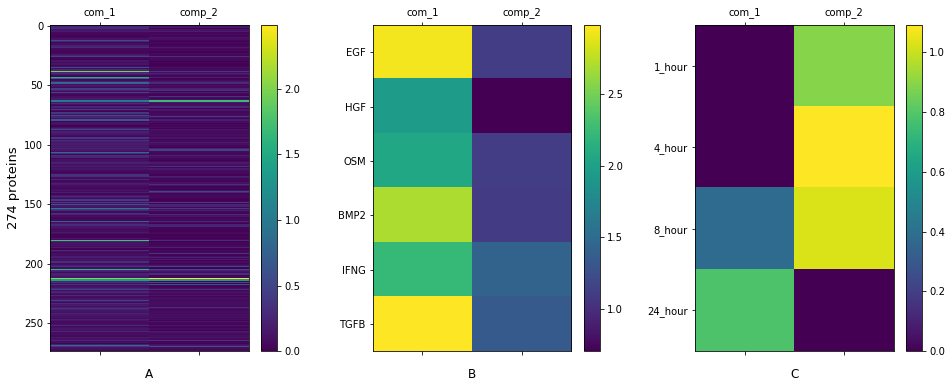

In [18]:
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace=0, wspace=0.3)

ax1 = fig.add_subplot(131)
cax1 = ax1.matshow(A)
ax1.set_aspect('auto')
ax1.set_title('A', y=-0.1)
fig.colorbar(cax1)
ax1.set_ylabel(str(tensor.shape[1])+' proteins', size=(13))
ax1.set_xticklabels(['','com_1', 'comp_2', 'comp_3'])

ax2 = fig.add_subplot(132)
cax2 = ax2.matshow(B)
ax2.set_aspect('auto')
ax2.set_title('B', y=-0.1)
fig.colorbar(cax2)
# ax2.set_ylabel(str(tensor.shape[2])+" ligands", size=(13))
ax2.set_yticklabels(ligand_names.insert(0,''))
ax2.set_xticklabels(['','com_1', 'comp_2', 'comp_3'])

ax3 = fig.add_subplot(133)
cax3 = ax3.matshow(C)
ax3.set_aspect('auto')
ax3.set_title('C', y=-0.1)
# ax3.set_ylabel(tensor.shape[0], size=(13))
# ax3.set_yticklabels(['','4_hour','8_hour','24_hour','48_hour'])
ax3.set_yticklabels(['','1_hour','4_hour','8_hour','24_hour','48_hour'])
ax3.set_xticklabels(['','com_1', 'comp_2', 'comp_3'])

fig.colorbar(cax3)

# Step 4. Results Interpretation (RPPA data) 

In [19]:
component_preds = A.argmax(axis=1) # classify proteins into respective components based on the largest membership values
print('{} proteins in total, each protein belongs to a predicted component with the largest membership value:\n\n'.format(A.shape[0]), component_preds)

component_preds_B = B.argmax(axis=1) # classify proteins into respective components based on the largest membership values
print('{} proteins in total, each protein belongs to a predicted component with the largest membership value:\n\n'.format(B.shape[0]), component_preds_B)


274 proteins in total, each protein belongs to a predicted component with the largest membership value:

 [0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1]
6 proteins in total, each protein belongs to a predicted component with the largest membership value:

 [0 0 0 0 0 0]


['0~201', '202~273']
(6, 274, 4)


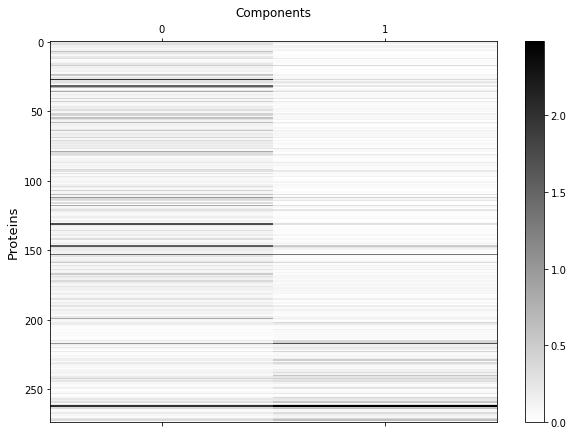

In [20]:
# rerange the proteins in matrix A
new_indexes = []
clusters = []
for k in range(num_component):
    idx = np.where(component_preds == k)[0]
    new_indexes.extend(idx)
    clusters.append(idx)

clustre_id_ranges = []
count = 0
for clu in clusters:
    id_range = str(count) + '~' + str(count+len(clu)-1)
    clustre_id_ranges.append(id_range)
    count += len(clu)
print(clustre_id_ranges)

# rank communities as a diagonal matrix
A_ranked = A[new_indexes]
protein_names_ranked = protein_names[new_indexes]
tensor_binary = rppa_averaged_binary.to_numpy()[new_indexes].reshape([rppa_averaged.shape[0],6,4]).transpose([1, 0, 2])
print(tensor_binary.shape)

fig = plt.figure(figsize=(10,7))
# fig.subplots_adjust(hspace=0, wspace=0.3)
ax = fig.add_subplot(111)
aa = ax.matshow(A_ranked,cmap=plt.cm.gray_r)
ax.set_aspect('auto')
ax.set_title('Components')
ax.set_ylabel('Proteins', size=(13))
ax.set_xticks(range(0,num_component))
fig.colorbar(aa)

In [21]:
new_indexes_B = []
clusters_B = []
for k in range(num_component):
    idx = np.where(component_preds_B == k)[0]
    new_indexes_B.extend(idx)
    clusters_B.append(idx)

clustre_id_ranges_B = []
count = 0
for clu in clusters_B:
    id_range = str(count) + '~' + str(count+len(clu)-1)
    clustre_id_ranges_B.append(id_range)
    count += len(clu)
print(clustre_id_ranges_B)

# rank communities as a diagonal matrix
# B_ranked = B[new_indexes_B]
# ligand_names_ranked = ligand_names[new_indexes_B]
B_ranked = B
ligand_names_ranked = ligand_names
B_ranked
ligand_names_ranked

['0~5', '6~5']


Index(['EGF', 'HGF', 'OSM', 'BMP2', 'IFNG', 'TGFB'], dtype='object')

In [22]:
protein_names_ranked

Index(['ACACApS79', 'ACTB', 'ADAR', 'AIM1', 'AKT', 'AKT1S1', 'AR', 'ARAF',
       'ARID1A', 'ATG7',
       ...
       'RPS6KB1pT389', 'SNAI1', 'SRCpY416', 'STAT3pY705', 'TSC2pT1462',
       'ULK1pS757', 'WEE1pS642', 'WWTR1', 'YBX1pS102', 'ZAP70'],
      dtype='object', name='Protein', length=274)

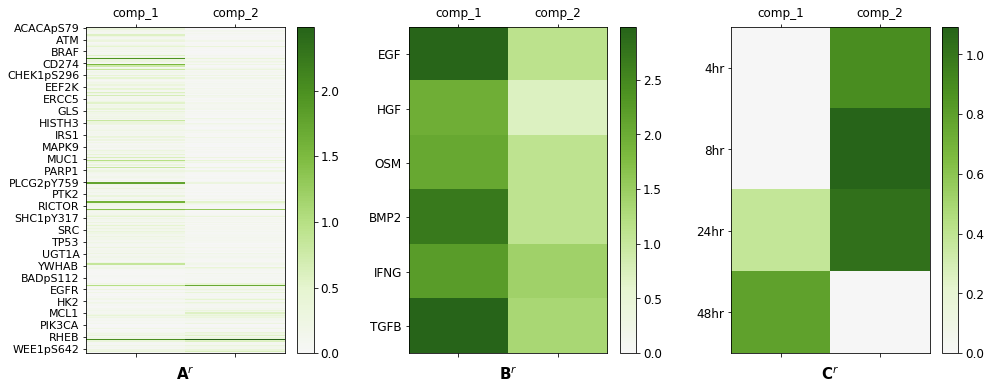

In [58]:
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace=0, wspace=0.3)

ax1 = fig.add_subplot(131)
plt.set_cmap('PiYG')
norm = colors.DivergingNorm(vcenter=0)
cax1 = ax1.matshow(A_ranked,norm=norm)
ax1.set_aspect('auto')
ax1.set_title('$\mathbf{A}^r$', y=-0.1, fontsize=15)
plt.rc('ytick',labelsize=12)
fig.colorbar(cax1)

# ax1.set_ylabel(str(tensor.shape[1])+' proteins', fontsize=14)
ax1.set_yticks(range(len(protein_names_ranked)))
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax1.yaxis.set_major_locator(loc)
show_protein_names = protein_names_ranked[range(0, len(protein_names_ranked), 10)].insert(0,'')
ax1.set_yticklabels(show_protein_names, fontsize=11)

ax1.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'], fontsize=12)

ax2 = fig.add_subplot(132)

plt.set_cmap('PiYG')
cax2 = ax2.matshow(B_ranked,norm =colors.DivergingNorm(vcenter=0))
ax2.set_aspect('auto')
ax2.set_title('$\mathbf{B}^r$', y=-0.1, fontsize=15)
fig.colorbar(cax2)
plt.rc('ytick',labelsize=12)
# ax2.set_ylabel(str(tensor.shape[2])+" ligands", size=(13))
ax2.set_yticklabels(ligand_names_ranked.insert(0,''))
ax2.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'], fontsize=12)

ax3 = fig.add_subplot(133)
cax3 = ax3.matshow(C, cmap='PiYG', norm =colors.DivergingNorm(vcenter=0))
ax3.set_aspect('auto')
ax3.set_title('$\mathbf{C}^r$', y=-0.1, fontsize=15)
plt.rc('ytick',labelsize=12)
# ax3.set_ylabel(tensor.shape[0], size=(13))
ax3.set_yticklabels(['', '4hr','8hr','24hr','48hr'])
ax3.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'], fontsize=12)

fig.colorbar(cax3)

# import Image
# fig.savefig('testplot.png')
# Image.open('testplot.png').save('testplot.jpg','JPEG')

In [24]:
# save the A,B and C matrices
A_out = pd.DataFrame(data=A_ranked, index=protein_names_ranked, columns=['com_1','com_2'])
B_out = pd.DataFrame(data=B_ranked, index=ligand_names_ranked, columns=['com_1','com_2'])
C_out = pd.DataFrame(data=C, index=['4_hour','8_hour','24_hour','48_hour'], columns=['com_1','com_2'])


writer = pd.ExcelWriter("dataset/tumour_microenv_results_2020-9/rppa/Factors_rppa_ncp.xlsx")

A_out.to_excel(writer, "A")
B_out.to_excel(writer, "B")
C_out.to_excel(writer, "C")

writer.save()

In [25]:
for k in range(len(clusters)):
    proteins = ' '.join(protein_names[clusters[k]])
    print('Protein cluster {}: {}\n'.format(k, proteins))

Protein cluster 0: ACACApS79 ACTB ADAR AIM1 AKT AKT1S1 AR ARAF ARID1A ATG7 ATM ATRpS428 AXL BAP1 BAX BCL2A1 BCL2L1 BCL2L11 BIRC3 BRAFpS445 BRAF BRD4 C12ORF5 CASP3 CASP7 CASP8 CAV1 CCNB1 CCND1 CCND3 CD274 CD29 CDC2 CDC25C CDH3 CDK1pY15 CDKN1A CDKN1BpT198 CDKN1B CDKN2A CHEK1pS296 CHEK1 CHEK2 CLDN7 CMC2 COG3 CREB1 CTNNB1 DIABLO EEF2 EEF2K EIF4EpS209 EIF4EBP1pS65 EIF4G1 ENY2 EPPK1 ERBB2 ERBB3pY1289 ERBB3 ERCC4 ERCC5 ERRFI1 ESR1 FASN FOXM1 FOXO3pS318S321 FOXO3 G6PD GAB2 GJA1 GLS GLUD1 GSK3A GYS1pS641 GYS1 H2AFXpS140 H3K9ME2 HES1 HIST1H2BA HIST3H3 HISTH3 HSBP1pS82 HSBP1 HSPA1A HSPA5 IGF1RpY1135Y1136 IGF1R IGFBP2 INPP4B INSRB IRS1 KAT2A KDR L1CAM LCK LDHA LRP6pS1490 MAP2K1 MAPK3 MAPK8pT183Y185 MAPK9 MAPT METpY1234Y1235 MIF MKNK1 MMP2 MS4A1 MSH6 MSI2 MTOR MUC1 MYH11 MYH2pS1943 MYT1 NDRG1pT346 NDUFB4 NF2 PAK4 PAR-2 PARK7 PARP1 PDCD4 PDHK1 PDPK1pS241 PDPK1 PEA15pS116 PEA15 PGR PIK3CB PKM PLCG2pY759 PLK1 PMS2 POU5F1 PPIF PREX1 PRKAR1A PRKCA PTEN PTGS3 PTK2 PTPRC PXN RAB11A RAD50 RAD51 RAF1 RB1pS8

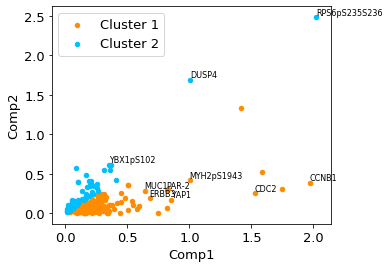

In [476]:
fig = plt.figure(figsize=(5,4))
colors = ['darkorange','deepskyblue']
for k in range(len(clusters)):
    plt.scatter(A[clusters[k], 0], A[clusters[k], 1], c=colors[k], s=20,label='Cluster '+str(k+1))

for v in np.random.choice(clusters[0],100,replace=False):
    if A[v, 0] > 0.6:
        plt.text(A[v, 0], A[v, 1]+.03, protein_names[v], fontsize=8)
for v in np.random.choice(clusters[1],50,replace=False):
    if A[v, 1] > 0.6:
        plt.text(A[v, 0], A[v, 1]+.03, protein_names[v], fontsize=8)
        
plt.xticks(fontsize=13)
plt.xlabel('Comp1', fontsize=13)
plt.ylabel('Comp2', fontsize=13)
plt.legend(fontsize=13)    

[17, 110, 131, 24, 167, 159, 112, 55, 58, 33, 7, 153, 64, 264, 262, 240, 263, 259, 217]
['ACACApS79', 'AKT', 'ARID1A', 'AXL', 'BCL2L1', 'BRAF', 'CASP7', 'CCND1', 'CDC2', 'CDKN1A', 'CHEK1pS296', 'CMC2', 'DIABLO', 'EIF4EBP1pS65', 'ERBB2', 'ERCC5', 'FOXM1', 'GAB2', 'GSK3A', 'H3K9ME2', 'HISTH3', 'HSPA5', 'INPP4B', 'KDR', 'LRP6pS1490', 'MAPK9', 'MKNK1', 'MSI2', 'MYH2pS1943', 'NF2', 'PARP1', 'PDPK1', 'PIK3CB', 'PMS2', 'PRKAR1A', 'PTK2', 'RAD50', 'RBM15', 'RPA2pS4S8', 'RPS6KB1', 'SHC1pY317', 'SMAD3', 'SOX2', 'STAT3', 'TFAM', 'TP53', 'TTF1', 'TYRO3', 'VTCN1', 'XPA', 'YWHAB', 'AKTpS473', 'ATG3', 'BECN1', 'COL6A1', 'EGFR', 'ERCC1', 'GSK3BpS21S9', 'ITGA2', 'LC3AB', 'MCL1', 'NOTCH1', 'PAK1', 'PRKAA1pT172', 'PRKCDpS664', 'RHEB', 'RPS6KB1pT389', 'TSC2pT1462', 'YBX1pS102']


[Text(0, 1, ''),
 Text(0, 1, 'comp_1'),
 Text(0, 1, 'comp_2'),
 Text(0, 1, 'comp_3')]

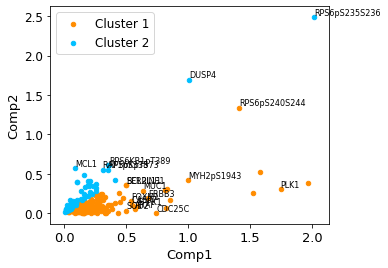

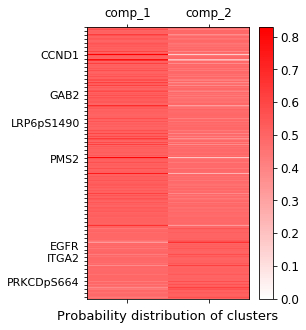

In [57]:
component_preds_ranked = A_ranked.argmax(axis=1)
clusters_ranked = []
for k in range(num_component):
    idx = np.where(component_preds_ranked == k)[0]
    clusters_ranked.append(idx)
    

fig = plt.figure(figsize=(5,4))
# fig.subplots_adjust(hspace=0, wspace=1.1)

# ax = fig.add_subplot(121)
colss = ['darkorange','deepskyblue']
for k in range(len(clusters_ranked)):
    plt.scatter(A_ranked[clusters_ranked[k], 0], A_ranked[clusters_ranked[k], 1], c=colss[k], s=20,label='Cluster '+str(k+1))

show_ids = []
for v in np.random.choice(clusters_ranked[0],100, replace=False):
    if A_ranked[v, 0] > 0.5:
        plt.text(A_ranked[v, 0], A_ranked[v, 1]+.03, protein_names_ranked[v], fontsize=8)
        show_ids.append(v)
for v in np.random.choice(clusters_ranked[1],50, replace=False):
    if A_ranked[v, 1] > 0.5:
        plt.text(A_ranked[v, 0], A_ranked[v, 1]+.03, protein_names_ranked[v], fontsize=8)
        show_ids.append(v)
        
plt.xticks(fontsize=13)
plt.xlabel('Comp1', fontsize=13)
plt.ylabel('Comp2', fontsize=13)
plt.legend(fontsize=12)   

print(show_ids)

from scipy.special import softmax

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(122)
cax1 = ax1.matshow(softmax(A_ranked,axis=1),cmap='bwr',norm = colors.DivergingNorm(vcenter=0))
ax1.set_aspect('auto')
ax1.set_title('Probability distribution of clusters', y=-0.1,fontsize=13)
fig.colorbar(cax1)
plt.rc('ytick',labelsize=12)


loc = plticker.MultipleLocator(base=4) # this locator puts ticks at regular intervals
ax1.yaxis.set_major_locator(loc)
show_protein_names = protein_names_ranked[range(0, len(protein_names_ranked), 4)].to_list()

# ax1.set_yticks(range(len(protein_names_ranked)))
# # loc = plticker.MultipleLocator(base=3) # this locator puts ticks at regular intervals
# # ax1.yaxis.set_major_locator(loc)
# show_protein_names = protein_names_ranked.to_list()
print(show_protein_names)
for i in range(len(show_protein_names)):
    if i not in show_ids:
        show_protein_names[i] = ''
show_protein_names = [''] + show_protein_names
ax1.set_yticklabels(show_protein_names, fontsize=11)

ax1.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'],fontsize=12)

['ACACApS79', 'AKT', 'ARID1A', 'AXL', 'BCL2L1', 'BRAF', 'CASP7', 'CCND1', 'CDC2', 'CDKN1A', 'CHEK1', 'COG3', 'EEF2', 'EIF4G1', 'ERBB3pY1289', 'ERRFI1', 'FOXO3pS318S321', 'GJA1', 'GYS1pS641', 'HES1', 'HSBP1pS82', 'IGF1RpY1135Y1136', 'INSRB', 'L1CAM', 'MAP2K1', 'MAPT', 'MMP2', 'MTOR', 'MYT1', 'PAK4', 'PDCD4', 'PEA15pS116', 'PKM', 'POU5F1', 'PRKCA', 'PTPRC', 'RAD51', 'RELApS536', 'RPS6pS240S244', 'SCD', 'SLC16A4', 'SMAD4', 'SRCpY527', 'STAT5A', 'TFRC', 'TRIM25', 'TUBA1A', 'UBAC1', 'WEE1', 'XRCC1', 'YWHAZ', 'AKTpT308', 'BABAM1pS29', 'BID', 'DUSP4', 'EIF4EBP1', 'GATA6', 'HK2', 'JAK2', 'MAPK1pT202Y204', 'MTORpS2448', 'NRAS', 'PIK3CA', 'PRKAA1pS345', 'PTPN11pY542', 'RPS6pS235S236', 'SRCpY416', 'WEE1pS642']


[Text(0, 1, ''),
 Text(0, 1, 'Cluster 1'),
 Text(0, 1, 'Cluster 2'),
 Text(0, 1, 'comp_3')]

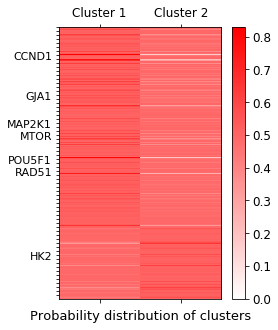

In [929]:
from scipy.special import softmax

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(122)
cax1 = ax1.matshow(softmax(A_ranked,axis=1),cmap='bwr',norm = colors.DivergingNorm(vcenter=0))
ax1.set_aspect('auto')
ax1.set_title('Probability distribution of clusters', y=-0.1,fontsize=13)
fig.colorbar(cax1)
plt.rc('ytick',labelsize=12)

oc = plticker.MultipleLocator(base=4) # this locator puts ticks at regular intervals
ax1.yaxis.set_major_locator(loc)
show_protein_names = protein_names_ranked[range(0, len(protein_names_ranked), 4)].to_list()

# ax1.set_yticks(range(len(protein_names_ranked)))
# # loc = plticker.MultipleLocator(base=3) # this locator puts ticks at regular intervals
# # ax1.yaxis.set_major_locator(loc)
# show_protein_names = protein_names_ranked.to_list()
print(show_protein_names)
for i in range(len(show_protein_names)):
    if i not in show_ids:
        show_protein_names[i] = ''
show_protein_names = [''] + show_protein_names
ax1.set_yticklabels(show_protein_names, fontsize=11)

ax1.set_xticklabels(['','Cluster 1', 'Cluster 2', 'comp_3'],fontsize=12)

## Fold Change Pattern mining 

# combine A and B

(274, 6)
mean:0.6854600322731317, std:0.8882389944193415


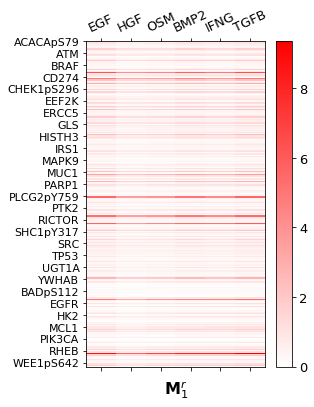

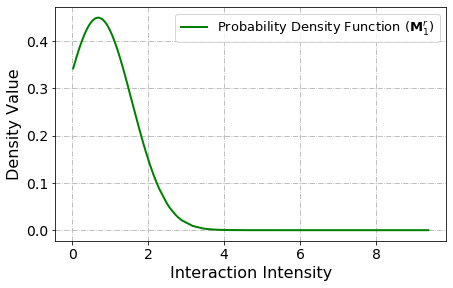

In [100]:
B_expand = np.expand_dims(B_ranked, axis=1)
patterns_AB = np.sum(np.transpose(np.multiply(A_ranked, B_expand), [1,0,2]), axis=2)
print(patterns_AB.shape)

fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
aa = ax.matshow(patterns_AB,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
ax.set_aspect('auto')
# ax.set_title('Components')
# ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(16))
ax.set_yticks(range(len(protein_names_ranked)))
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)
show_protein_names = protein_names_ranked[range(0, len(protein_names_ranked), 10)].insert(0,'')
ax.set_yticklabels(show_protein_names, fontsize=11)

plt.rc('ytick',labelsize=13)
ax.set_xticklabels(ligand_names_ranked.insert(0,''), fontsize=13, rotation =25)
ax.set_title('$\mathbf{M}_1^r$', y=-0.1, fontsize=16)
fig.colorbar(aa)

# fitting the data with a gaussian distribution
from scipy.stats import norm
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)

flatten_AB = patterns_AB.flatten()
flatten_AB.sort()
mean, std = norm.fit(flatten_AB)
print('mean:{}, std:{}'.format(mean, std))

fitted_pdf = norm.pdf(flatten_AB, loc=mean, scale=std)
linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(flatten_AB, fitted_pdf, color="green", **linestyle, fmt='-')
plt.xlabel("Interaction Intensity", fontsize=16)
plt.ylabel("Density Value", fontsize=16)
plt.legend(['Probability Density Function ($\mathbf{M}_1^r$)'], fontsize=13)
plt.grid(linestyle='-.')


writer_intensity = pd.ExcelWriter("dataset/tumour_microenv_results_2020-9/rppa/Intensity_dist_rppa_ncp.xlsx")

intense_density = np.concatenate([flatten_AB, fitted_pdf]).reshape(2,flatten_AB.shape[0]).transpose([1,0])
intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
intense_density_mat.loc[-1] = [mean, std]
intense_density_mat.index = intense_density_mat.index + 1
intense_density_mat = intense_density_mat.sort_index()
intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
intense_density_mat.to_excel(writer_intensity, "M1_AB")
writer_intensity.save()

# start_ind = 175
# patterns_AB_part = patterns_AB[start_ind:]

# num_protein = patterns_AB.shape[0]
# pairs = pd.DataFrame(data=patterns_AB_part, index=range(start_ind, num_protein), columns=ligand_names_ranked)
# s = pd.Series(range(start_ind, num_protein))
# pairs= pairs.set_index([s, protein_names_ranked[s]])
# pairs

# combine A and C

(274, 4)
mean:0.16158671265734956, std:0.24711017464128318


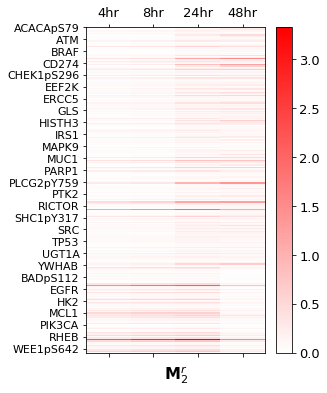

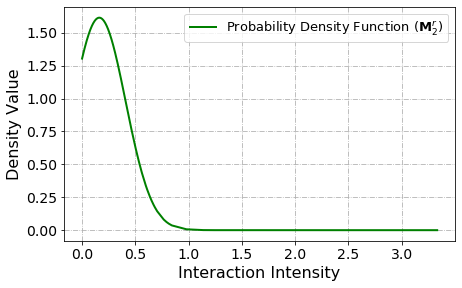

In [101]:
C_expand = np.expand_dims(C, axis=1)
patterns_AC = np.sum(np.transpose(np.multiply(A_ranked, C_expand), [1,0,2]), axis=2)
print(patterns_AC.shape)

fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
aa = ax.matshow(patterns_AC,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
ax.set_aspect('auto')
# ax.set_title('Components')
# ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(16))

ax.set_yticks(range(len(protein_names_ranked)))
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)
show_protein_names = protein_names_ranked[range(0, len(protein_names_ranked), 10)].insert(0,'')
ax.set_yticklabels(show_protein_names, fontsize=11)

plt.rc('ytick',labelsize=13)

# ax.set_xticks(range(0,num_component))
# ax.set_xticklabels(['','4_hour','8_hour','24_hour','48_hour'])
ax.set_xticklabels(['','4hr','8hr','24hr','48hr'], fontsize=13)
ax.set_title('$\mathbf{M}_2^r$', y=-0.1, fontsize=16)
fig.colorbar(aa)

# fitting the data with a gaussian distribution
from scipy.stats import norm
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)

flatten_AC = patterns_AC.flatten()
flatten_AC.sort()
mean, std = norm.fit(flatten_AC)
print('mean:{}, std:{}'.format(mean, std))

fitted_pdf = norm.pdf(flatten_AC, loc=mean, scale=std)
linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')
plt.xlabel("Interaction Intensity", fontsize=16)
plt.ylabel("Density Value", fontsize=16)
plt.legend(['Probability Density Function ($\mathbf{M}_2^r$)'],fontsize=13)
plt.grid(linestyle='-.')

patterns_AC_pairs_new = pd.DataFrame(data=patterns_AC, index=protein_names_ranked, 
                                     columns=['4_hour','8_hour','24_hour','48_hour'])


intense_density = np.concatenate([flatten_AC, fitted_pdf]).reshape(2,flatten_AC.shape[0]).transpose([1,0])
intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
intense_density_mat.loc[-1] = [mean, std]
intense_density_mat.index = intense_density_mat.index + 1
intense_density_mat = intense_density_mat.sort_index()
intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
intense_density_mat.to_excel(writer_intensity, "M2_AC")
writer_intensity.save()

# start_ind = 230
# patterns_AC_part = patterns_AC[start_ind:]

# num_protein = patterns_AC.shape[0]
# pairs = pd.DataFrame(data=patterns_AC_part, index=range(start_ind, num_protein), 
# #                      columns=['4_hour','8_hour','24_hour','48_hour'])
#                      columns=['1_hour','4_hour','8_hour','24_hour','48_hour'])
# s = pd.Series(range(start_ind, num_protein))
# pairs= pairs.set_index([s, protein_names_ranked[s]])
# pairs

(274, 4)
EGF, mean:0.04543378747470191, std:0.2917352825325691
HGF, mean:0.05010453438575947, std:0.290969482510865
OSM, mean:0.05454681066392837, std:0.29016951866977325
BMP2, mean:0.046329206055029847, std:0.2915944251609844
IFNG, mean:0.04484308497504042, std:0.29182666404661456
TGFB, mean:0.04576979220696402, std:0.2916827561581001


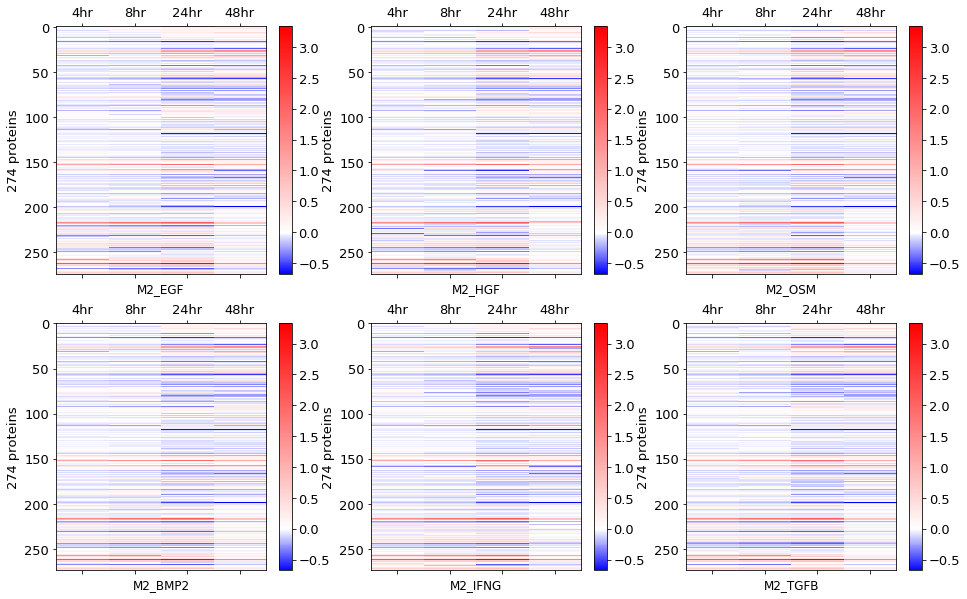

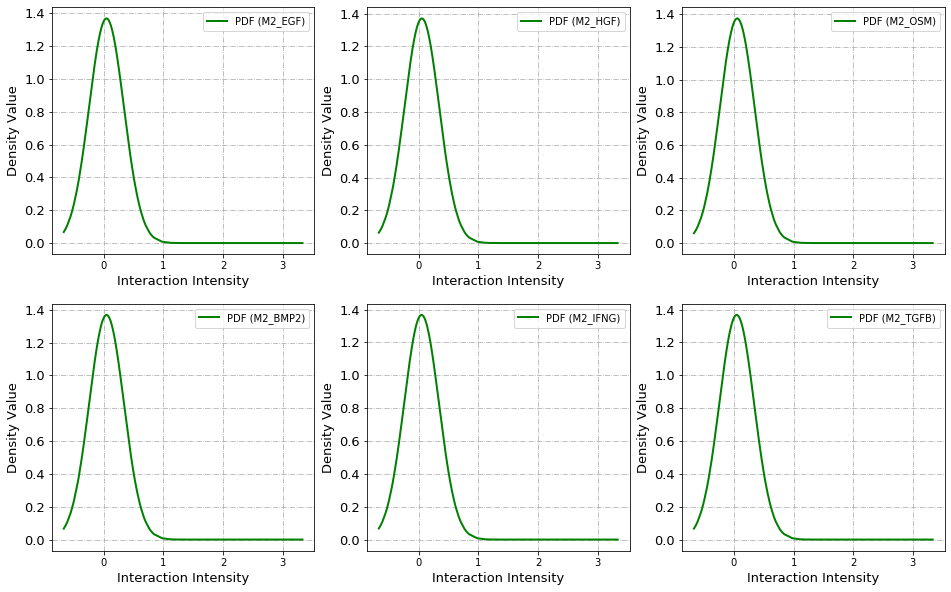

In [102]:
from matplotlib import colors

C_expand = np.expand_dims(C, axis=1)
patterns_AC = np.sum(np.transpose(np.multiply(A_ranked, C_expand), [1,0,2]), axis=2)
print(patterns_AC.shape)

patterns_AC_by_lignad = tensor_binary * patterns_AC

norm = colors.DivergingNorm(vcenter=0)
fig = plt.figure(figsize=(16,10))
plt.set_cmap('bwr')
for i in range(patterns_AC_by_lignad.shape[0]):
    ax = fig.add_subplot(2,3,i+1)
    aa = ax.matshow(patterns_AC_by_lignad[i], norm=norm)
    ax.set_aspect('auto')
    ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(13))
    ax.set_xticklabels(['','4hr','8hr','24hr','48hr'], fontsize=13)
    ax.set_title('M2_'+str(ligand_names_ranked[i]), y=-0.1)
    fig.colorbar(aa)


# fig = plt.figure(figsize=(10,7))
# ax = fig.add_subplot(111)
# aa = ax.matshow(patterns_AC,cmap=plt.cm.gray_r)
# ax.set_aspect('auto')
# # ax.set_title('Components')
# ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(13))
# # ax.set_xticks(range(0,num_component))
# ax.set_xticklabels(['','1_hour','4_hour','8_hour','24_hour','48_hour'])
# # ax.set_xticklabels(['','4_hour','8_hour','24_hour','48_hour'])
# ax.set_title('M2', y=-0.1)
# fig.colorbar(aa)

# fitting the data with a gaussian distribution
from scipy.stats import norm
# fig = plt.figure(figsize=(7, 4.3))
# ax = fig.add_subplot(111)
# ax.tick_params(axis='both', which='major', labelsize=14)


intensity_dist_rppa_mats = []
fig = plt.figure(figsize=(16,10))
plt.set_cmap('bwr')
for i in range(patterns_AC_by_lignad.shape[0]):
    ax = fig.add_subplot(2,3,i+1)
#     ax.tick_params(axis='both', which='major', labelsize=14)
    flatten_AC = patterns_AC_by_lignad[i].flatten()
    flatten_AC.sort()
    mean, std = norm.fit(flatten_AC)
    
    print('{}, mean:{}, std:{}'.format(ligand_names_ranked[i], mean, std))
    fitted_pdf = norm.pdf(flatten_AC, loc=mean, scale=std)
    
    intense_density = np.concatenate([flatten_AC, fitted_pdf]).reshape(2,flatten_AC.shape[0]).transpose([1,0])
    intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
    intense_density_mat.loc[-1] = [mean, std]
    intense_density_mat.index = intense_density_mat.index + 1
    intense_density_mat = intense_density_mat.sort_index()
    intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
    intense_density_mat.to_excel(writer_intensity, "M2_AC_per_ligand_"+ligand_names_ranked[i])
    writer_intensity.save()
    
    linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
    plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')
    plt.xlabel("Interaction Intensity", fontsize=13)
    plt.ylabel("Density Value", fontsize=13)
    plt.legend(['PDF (M2_'+str(ligand_names_ranked[i])+")"])
    plt.grid(linestyle='-.')
    
    

# flatten_AC = patterns_AC.flatten()
# flatten_AC.sort()
# mean, std = norm.fit(flatten_AC)
# print('mean:{}, std:{}'.format(mean, std))

# fitted_pdf = norm.pdf(flatten_AC, loc=mean, scale=std)
# linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
# plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')
# plt.xlabel("Interaction Intensity", fontsize=16)
# plt.ylabel("Density Value", fontsize=16)
# plt.legend(['Probability Density Function (M2)'])
# plt.grid(linestyle='-.')

# start_ind = 169
# patterns_AC_part = patterns_AC[start_ind:]

# num_protein = patterns_AC.shape[0]
# pairs = pd.DataFrame(data=patterns_AC_part, index=range(start_ind, num_protein), 
# #                      columns=['4_hour','8_hour','24_hour','48_hour'])
#                      columns=['1_hour','4_hour','8_hour','24_hour','48_hour'])
# s = pd.Series(range(start_ind, num_protein))
# pairs= pairs.set_index([s, protein_names_ranked[s]])
# pairs

# combine B and C

(6, 4)
mean:1.581468594626907, std:0.5437133655231975


,,4_hour,8_hour,24_hour,48_hour
0,EGF,1.003777,1.223764,2.280814,2.311921
1,HGF,0.632067,0.770590,1.478726,1.543166
2,OSM,1.000545,1.219824,1.940147,1.619586
3,BMP2,0.983022,1.198460,2.165001,2.123054
4,IFNG,1.279508,1.559924,2.325231,1.750917
5,TGFB,1.205254,1.469397,2.527785,2.342766


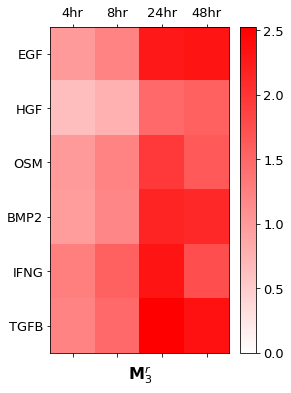

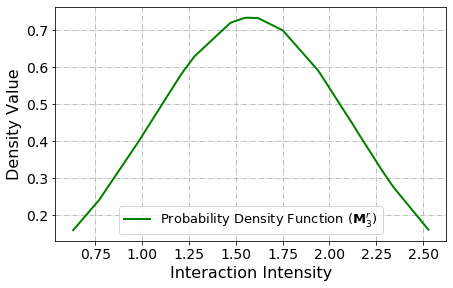

In [103]:
C_expand = np.expand_dims(C, axis=1)
patterns_BC = np.sum(np.transpose(np.multiply(B_ranked, C_expand), [1,0,2]), axis=2)
print(patterns_BC.shape)

fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
aa = ax.matshow(patterns_BC,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
ax.set_aspect('auto')
# ax.set_title('Components')
# ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(13))
# ax.set_xticks(range(0,num_component))
ax.set_yticklabels(ligand_names_ranked.insert(0,''), size=(13))



ax.set_xticklabels(['','4hr','8hr','24hr','48hr'], fontsize=13)
# ax.set_xticklabels(['','4_hour','8_hour','24_hour','48_hour'])
ax.set_title('$\mathbf{M}_3^r$', y=-0.1, fontsize=16)
fig.colorbar(aa)

# fitting the data with a gaussian distribution
from scipy.stats import norm
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)

flatten_BC = patterns_BC.flatten()
flatten_BC.sort()
mean, std = norm.fit(flatten_BC)
print('mean:{}, std:{}'.format(mean, std))

fitted_pdf = norm.pdf(flatten_BC, loc=mean, scale=std)
linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(flatten_BC, fitted_pdf, color="green", **linestyle, fmt='-')
plt.xlabel("Interaction Intensity", fontsize=16)
plt.ylabel("Density Value", fontsize=16)
plt.legend(['Probability Density Function ($\mathbf{M}_3^r$)'],fontsize=13)
plt.grid(linestyle='-.')


intense_density = np.concatenate([flatten_BC, fitted_pdf]).reshape(2,flatten_BC.shape[0]).transpose([1,0])
intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
intense_density_mat.loc[-1] = [mean, std]
intense_density_mat.index = intense_density_mat.index + 1
intense_density_mat = intense_density_mat.sort_index()
intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
intense_density_mat.to_excel(writer_intensity, "M3_BC")
writer_intensity.save()


patterns_BC_part = patterns_BC

num_ligand = patterns_BC.shape[0]
pairs = pd.DataFrame(data=patterns_BC_part, index=range(0,num_ligand), 
#                      columns=['4_hour','8_hour','24_hour','48_hour'])
                     columns=['4_hour','8_hour','24_hour','48_hour'])
s = pd.Series(range(num_ligand))
pairs= pairs.set_index([s, ligand_names_ranked[s]])
pairs

In [66]:
# save M1, M2 and M3 into files
# num_protein = patterns_AB.shape[0]
# patterns_AB_pairs = pd.DataFrame(data=patterns_AB, index=protein_names_ranked, columns=ligand_names_ranked)

# patterns_AC_pairs = pd.concat([pd.DataFrame(x, index=protein_names_ranked, 
#                              columns=['1_h','4_h','8_h','24_h','48_h']) for x in patterns_AC_by_lignad], 
#                axis=1,
#               keys=ligand_names_ranked)

# num_ligand = patterns_BC.shape[0]
# patterns_BC_pairs = pd.DataFrame(data=patterns_BC, index=ligand_names_ranked, 
# #                      columns=['4_hour','8_hour','24_hour','48_hour'])
#                      columns=['1_hour','4_hour','8_hour','24_hour','48_hour'])

# writer = pd.ExcelWriter("data/M_rppa_ncp.xlsx")

# patterns_AB_pairs.to_excel(writer, "M1_AB")
# patterns_AC_pairs.to_excel(writer, "M2_AC")
# patterns_BC_pairs.to_excel(writer, "M3_BC")
# writer.save()


# save M1, M2 and M3 into files
num_protein = patterns_AB.shape[0]
patterns_AB_pairs = pd.DataFrame(data=patterns_AB, index=protein_names_ranked, columns=ligand_names_ranked)

patterns_AC_pairs = pd.concat([pd.DataFrame(x, index=protein_names_ranked, 
                             columns=['4_h','8_h','24_h','48_h']) for x in patterns_AC_by_lignad], 
               axis=1,
              keys=ligand_names_ranked)

num_ligand = patterns_BC.shape[0]
patterns_BC_pairs = pd.DataFrame(data=patterns_BC, index=ligand_names_ranked, 
#                      columns=['4_hour','8_hour','24_hour','48_hour'])
                     columns=['4_hour','8_hour','24_hour','48_hour'])

writer = pd.ExcelWriter("dataset/tumour_microenv_results_2020-9/rppa/M_rppa_ncp.xlsx")

patterns_AB_pairs.to_excel(writer, "M1_AB")
patterns_AC_pairs_new.to_excel(writer, "M2_AC")
patterns_AC_pairs.to_excel(writer, "M2_AC_per_ligands")
patterns_BC_pairs.to_excel(writer, "M3_BC")

writer.save()

In [67]:
patterns_AC_pairs

EGF                                     HGF            \
                4_h       8_h      24_h      48_h       4_h       8_h   
Protein                                                                 
ACACApS79  0.074731  0.091109 -0.125882  0.081870  0.074731  0.091109   
ACTB       0.131530  0.160357  0.255491  0.213816  0.131530  0.160357   
ADAR      -0.000000  0.000000  0.127040  0.261034  0.000000  0.000000   
AIM1       0.116533  0.142073  0.187070  0.108706  0.116533  0.142073   
AKT       -0.103565  0.126263  0.176497  0.117659 -0.103565 -0.126263   
...             ...       ...       ...       ...       ...       ...   
ULK1pS757  0.127367 -0.155280 -0.184499 -0.077796  0.127367 -0.155280   
WEE1pS642  0.087647  0.106855  0.123096  0.045593  0.087647 -0.106855   
WWTR1      0.333780  0.406930  0.483929  0.204754  0.333780  0.406930   
YBX1pS102  0.548774  0.669043  0.766458  0.276684  0.548774  0.669043   
ZAP70     -0.059790 -0.072893 -0.084345 -0.031867 -0.059790 -0.072893   

                                    OSM            ...      BMP2            \
               24_h      48_h       4_h       8_h  ...      24_h      48_h   
Protein                                            ...                       
ACACApS79  0.125882  0.081870 -0.074731  0.091109  ... -0.125882  0.081870   
ACTB       0.255491  0.213816  0.131530  0.160357  ...  0.255491  0.213816   
ADAR       0.127040  0.261034 -0.000000  0.000000  ...  0.127040  0.261034   
AIM1       0.187070  0.108706  0.116533  0.142073  ...  0.187070  0.108706   
AKT       -0.176497  0.117659 -0.103565 -0.126263  ...  0.176497  0.117659   
...             ...       ...       ...       ...  ...       ...       ...   
ULK1pS757  0.184499  0.077796  0.127367 -0.155280  ...  0.184499  0.077796   
WEE1pS642  0.123096  0.045593  0.087647 -0.106855  ...  0.123096  0.045593   
WWTR1      0.483929  0.204754  0.333780  0.406930  ...  0.483929  0.204754   
YBX1pS102  0.766458  0.276684  0.548774  0.669043  ...  0.766458  0.276684   
ZAP70      0.084345 -0.031867 -0.059790 -0.072893  ...  0.084345 -0.031867   

               IFNG                                    TGFB            \
                4_h       8_h      24_h      48_h       4_h       8_h   
Protein                                                                 
ACACApS79  0.074731  0.091109  0.125882  0.081870  0.074731  0.091109   
ACTB       0.131530  0.160357  0.255491  0.213816  0.131530  0.160357   
ADAR      -0.000000 -0.000000  0.127040  0.261034 -0.000000  0.000000   
AIM1       0.116533  0.142073  0.187070  0.108706  0.116533  0.142073   
AKT       -0.103565  0.126263  0.176497  0.117659 -0.103565 -0.126263   
...             ...       ...       ...       ...       ...       ...   
ULK1pS757  0.127367 -0.155280 -0.184499 -0.077796  0.127367  0.155280   
WEE1pS642  0.087647  0.106855  0.123096  0.045593  0.087647  0.106855   
WWTR1      0.333780  0.406930  0.483929  0.204754  0.333780  0.406930   
YBX1pS102  0.548774  0.669043  0.766458  0.276684  0.548774  0.669043   
ZAP70     -0.059790 -0.072893 -0.084345 -0.031867 -0.059790 -0.072893   

                               
               24_h      48_h  
Protein                        
ACACApS79 -0.125882  0.081870  
ACTB       0.255491  0.213816  
ADAR       0.127040  0.261034  
AIM1       0.187070  0.108706  
AKT        0.176497  0.117659  
...             ...       ...  
ULK1pS757  0.184499  0.077796  
WEE1pS642  0.123096  0.045593  
WWTR1      0.483929  0.204754  
YBX1pS102  0.766458  0.276684  
ZAP70     -0.084345 -0.031867  

[274 rows x 24 columns]

In [263]:
writer_mean = pd.ExcelWriter("dataset/tumour_microenv_results_2020-9-3/rppa/Correlation_by_cutoff_rppa_ncp.xlsx")


# EGF, mean:0.03946756491346985, std:0.26204972016303574
# HGF, mean:0.04395054561876228, std:0.2613352139638618
# OSM, mean:0.047432471143385495, std:0.26072572791912235
# BMP2, mean:0.04078242101516838, std:0.26184831229905964
# IFNG, mean:0.039575277716565944, std:0.26203347479163996
# TGFB, mean:0.04010555263978111, std:0.2619528376734676

# EGF, mean:0.045922522722390814, std:0.2927087461656169
# HGF, mean:0.05037852547596591, std:0.2919748145746538
# OSM, mean:0.05508170387162553, std:0.29112419012104535
# BMP2, mean:0.04695322677868952, std:0.2925451805620885
# IFNG, mean:0.045367038722678145, std:0.29279535510757515
# TGFB, mean:0.04643046560559886, std:0.2926286042728621

M1_mean = 0.705832797
M2_mean = 0.146566137
M2_means = [0.04078242101516822, 0.03957527771656577, 0.04010555263978096, 
              0.04395054561876215, 0.04743247114338529, 0.0394675649134697]
M3_mean = 1.42061465

#-----------------------center_MeanElbow-------------
M1_cutoff = 1.175759975 - M1_mean
M2_cutoff = 0.393018778 - M2_mean
M2_cutoffs = np.array([0.404407521,0.402916509,0.402916509,0.405481335,0.405481335,0.402916509]) - np.array(M2_means)
M3_cutoff = 1.930382736 - M3_mean

AB_stack = patterns_AB_pairs.T.stack().to_frame()
AB_stack.columns = ['Itensity']
AB_stack_sorted = AB_stack[~((AB_stack.values-M1_mean < M1_cutoff))]#.sort_values(by='Itensity',ascending=False)
AB_stack_sorted.to_excel(writer_mean, 'M1_center_MeanElbow')
writer_mean.save()


AC_stack = patterns_AC_pairs_new.T.stack().to_frame()
AC_stack.columns = ['Itensity']
AC_stack_sorted = AC_stack[~((AC_stack.values-M2_mean < M2_cutoff))]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted.to_excel(writer_mean, 'M2_center_MeanElbow')
writer_mean.save()


AC_stack = patterns_AC_pairs.T.stack().to_frame()
AC_stack.columns = ['Itensity']

left_rows = ~(((AC_stack.loc[ligand_names_ranked[0]].values-M2_means[0]) < M2_cutoffs[0]) &
            ((AC_stack.loc[ligand_names_ranked[0]].values-M2_means[0]) > -M2_cutoffs[0]))
for i in range(1,len(M2_cutoffs)):
     left_rows=np.concatenate((left_rows,~(((AC_stack.loc[ligand_names_ranked[i]].values-M2_means[i]) < M2_cutoffs[i]) &
            ((AC_stack.loc[ligand_names_ranked[i]].values-M2_means[i]) > -M2_cutoffs[i]))),axis=0)

AC_stack_sorted = AC_stack[left_rows]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted.to_excel(writer_mean, 'M2_per_ligand_center_MeanElbow')
writer_mean.save()

BC_stack = patterns_BC_pairs.T.stack().to_frame()
BC_stack.columns = ['Itensity']
BC_stack_sorted = BC_stack[~((BC_stack.values-M3_mean < M3_cutoff))]#.sort_values(by='Itensity',ascending=False)
BC_stack_sorted.to_excel(writer_mean, 'M3_center_MeanElbow')
writer_mean.save()

#------------------elbow-----------------
M1_cutoff = 2.751476388 - M1_mean
M2_cutoff = 0.688956825 - M2_mean
M2_cutoffs = np.array([0.726040089, 0.726040089, 0.726040089, 0.72647128, 0.72647128, 0.72647128]) - np.array(M2_means)
M3_cutoff= 2.238004278 - M3_mean

AB_stack = patterns_AB_pairs.T.stack().to_frame()
AB_stack.columns = ['Itensity']
AB_stack_sorted = AB_stack[~((AB_stack.values-M1_mean < M1_cutoff))]#.sort_values(by='Itensity',ascending=False)
AB_stack_sorted.to_excel(writer_mean, 'M1_Elbow')
writer_mean.save()


AC_stack = patterns_AC_pairs_new.T.stack().to_frame()
AC_stack.columns = ['Itensity']
AC_stack_sorted = AC_stack[~((AC_stack.values-M2_mean < M2_cutoff))]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted.to_excel(writer_mean, 'M2_Elbow')
writer_mean.save()


AC_stack = patterns_AC_pairs.T.stack().to_frame()
AC_stack.columns = ['Itensity']

left_rows = ~(((AC_stack.loc[ligand_names_ranked[0]].values-M2_means[0]) < M2_cutoffs[0]) &
            ((AC_stack.loc[ligand_names_ranked[0]].values-M2_means[0]) > -M2_cutoffs[0]))
for i in range(1,len(M2_cutoffs)):
     left_rows=np.concatenate((left_rows,~(((AC_stack.loc[ligand_names_ranked[i]].values-M2_means[i]) < M2_cutoffs[i]) &
            ((AC_stack.loc[ligand_names_ranked[i]].values-M2_means[i]) > -M2_cutoffs[i]))),axis=0)

AC_stack_sorted = AC_stack[left_rows]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted.to_excel(writer_mean, 'M2_per_ligand_Elbow')
writer_mean.save()

BC_stack = patterns_BC_pairs.T.stack().to_frame()
BC_stack.columns = ['Itensity']
BC_stack_sorted = BC_stack[~((BC_stack.values-M3_mean < M3_cutoff))]#.sort_values(by='Itensity',ascending=False)
BC_stack_sorted.to_excel(writer_mean, 'M3_Elbow')
writer_mean.save()

#------------------asymptotic-----------------
M1_cutoff = 3.830273512 - M1_mean
M2_cutoff = 0.61434385 - M2_mean
M2_cutoffs = np.array([0.920580446, 0.920580446, 0.920580446, 0.920580446, 0.920580446, 0.920580446]) - np.array(M2_means)
M3_cutoff=  2.273794325 - M3_mean

AB_stack = patterns_AB_pairs.T.stack().to_frame()
AB_stack.columns = ['Itensity']
AB_stack_sorted = AB_stack[~((AB_stack.values-M1_mean < M1_cutoff))]#.sort_values(by='Itensity',ascending=False)
AB_stack_sorted.to_excel(writer_mean, 'M1_Asymptotic')
writer_mean.save()


AC_stack = patterns_AC_pairs_new.T.stack().to_frame()
AC_stack.columns = ['Itensity']
AC_stack_sorted = AC_stack[~((AC_stack.values-M2_mean < M2_cutoff))]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted.to_excel(writer_mean, 'M2_Asymptotic')
writer_mean.save()


AC_stack = patterns_AC_pairs.T.stack().to_frame()
AC_stack.columns = ['Itensity']

left_rows = ~(((AC_stack.loc[ligand_names_ranked[0]].values-M2_means[0]) < M2_cutoffs[0]) &
            ((AC_stack.loc[ligand_names_ranked[0]].values-M2_means[0]) > -M2_cutoffs[0]))
for i in range(1,len(M2_cutoffs)):
     left_rows=np.concatenate((left_rows,~(((AC_stack.loc[ligand_names_ranked[i]].values-M2_means[i]) < M2_cutoffs[i]) &
            ((AC_stack.loc[ligand_names_ranked[i]].values-M2_means[i]) > -M2_cutoffs[i]))),axis=0)

AC_stack_sorted = AC_stack[left_rows]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted.to_excel(writer_mean, 'M2_per_ligand_Asymptotic')
writer_mean.save()

BC_stack = patterns_BC_pairs.T.stack().to_frame()
BC_stack.columns = ['Itensity']
BC_stack_sorted = BC_stack[~((BC_stack.values-M3_mean < M3_cutoff))]#.sort_values(by='Itensity',ascending=False)
BC_stack_sorted.to_excel(writer_mean, 'M3_Asymptotic')
writer_mean.save()

# Step 5. Data processing (GCP_PBS data)

* 1) Combine multiple simialr/same colums or rows as one
* 2) Normalize the data
* 3) Organize data of multiple time points as a 3-way tensor

In [68]:
# gcppbs_file = os.path.join('data','GCP_PBS_Timepoint_specific_normalized.csv')
# gcp_sheet = pd.read_csv(gcppbs_file)
gcppbs_file = os.path.join('dataset/gcp/','LINCS_GCP_Plate72_annotated_minimized_2019-12-16_16-53-04_LVL3_preprocessed.xlsx')

gcp_sheet = pd.read_excel(gcppbs_file, sheet_name='two_NaN_histone_removed_T')


gcp_sheet_T = gcp_sheet.set_index('histone').T
gcp_sheet_T.index.name = gcp_sheet_T.columns.name
gcp_sheet_T.columns.name = None

# gcp_p005_file = os.path.join('data','gcp_p005.xlsx')
# gcp_p005 = pd.read_excel(gcp_p005_file, sheet_name='Sheet1').set_index('ligand')
gcp_p005_file = os.path.join('dataset/tumour_microenv_results_2020-9-3/gcp/','pval_005_gcp.xlsx')
gcp_p005 = pd.read_excel(gcp_p005_file, sheet_name='Sheet1').set_index('histone')

sig_histones = gcp_p005.index

gcp_sheet_T = gcp_sheet_T[gcp_sheet_T.index.isin(sig_histones)]

# gcp_averaged = gcp_sheet_T.groupby(gcp_sheet_T.columns, axis=1, sort=False).mean()

gcp_averaged = gcp_sheet_T.groupby(gcp_sheet_T.columns, axis=1, sort=False).mean()
time_conditions=['_4','_8','_24','_48']

# rppa_averaged=rppa_averaged.apply(lambda x:x.columns, axis=1)

for time_condition in time_conditions:
    time_m=gcp_averaged.columns.str.endswith(time_condition)
    conditions=gcp_averaged.columns[time_m&(~gcp_averaged.columns.str.contains('ctrl'))].unique()
    print (conditions)
    for condition in conditions:
        gcp_averaged[condition] = gcp_averaged[condition]-gcp_averaged['ctrl_0']


gcp_averaged = gcp_averaged.drop('ctrl_0',axis=1)



gcp_averaged_binary = gcp_averaged.copy(deep=True)

gcp_averaged_binary[gcp_averaged_binary < 0] = -1
gcp_averaged_binary[gcp_averaged_binary >= 0] = 1

gcp_averaged_binary 

Index(['BMP2_4', 'EGF_4', 'HGF_4', 'IFNG_4', 'OSM_4', 'TGFB_4'], dtype='object')
Index(['BMP2_8', 'EGF_8', 'HGF_8', 'IFNG_8', 'OSM_8', 'TGFB_8'], dtype='object')
Index(['BMP2_24', 'EGF_24', 'HGF_24', 'IFNG_24', 'OSM_24', 'TGFB_24'], dtype='object')
Index(['BMP2_48', 'EGF_48', 'HGF_48', 'IFNG_48', 'OSM_48', 'TGFB_48'], dtype='object')


,BMP2_24,BMP2_4,BMP2_48,BMP2_8,EGF_24,EGF_4,EGF_48,EGF_8,HGF_24,HGF_4,...,IFNG_48,IFNG_8,OSM_24,OSM_4,OSM_48,OSM_8,TGFB_24,TGFB_4,TGFB_48,TGFB_8
histone,,,,,,,,,,,,,,,,,,,,,
H3K4me0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
H3K4me1,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
H3K4me2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
H3K4me3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
H3K4ac1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
H3K9me0K14ac0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0
H3K9me1K14ac0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0
H3K9me2K14ac0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
H3K9me3K14ac0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,...,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0


In [70]:
gcp_averaged_binary=gcp_averaged_binary[['EGF_4', 'HGF_4', 'OSM_4', 'BMP2_4', 'IFNG_4', 'TGFB_4',
       'EGF_8', 'HGF_8', 'OSM_8', 'BMP2_8', 'IFNG_8', 'TGFB_8',
       'EGF_24', 'HGF_24', 'OSM_24', 'BMP2_24', 'IFNG_24', 'TGFB_24',
       'EGF_48', 'HGF_48', 'OSM_48', 'BMP2_48', 'IFNG_48', 'TGFB_48']]

In [71]:
gcp_sheet = pd.read_excel(gcppbs_file, sheet_name='two_NaN_histone_removed_T')

gcp_sheet_T = gcp_sheet.set_index('histone')


gcp_p005_file = os.path.join('dataset/tumour_microenv_results_2020-9-3/gcp/','pval_005_gcp.xlsx')
gcp_p005 = pd.read_excel(gcp_p005_file, sheet_name='Sheet1').set_index('histone')

sig_histones = gcp_p005.index

gcp_averaged = gcp_sheet_T.groupby(gcp_sheet_T.index, sort=False).mean()
gcp_averaged = gcp_averaged.drop(columns=gcp_averaged.columns[~gcp_averaged.columns.isin(sig_histones)])

gcp_averaged= gcp_averaged.reindex(['ctrl_0',
               'EGF_4', 'EGF_8', 'EGF_24', 'EGF_48',
               'HGF_4', 'HGF_8', 'HGF_24', 'HGF_48', 
               'OSM_4', 'OSM_8','OSM_24', 'OSM_48', 
               'BMP2_4','BMP2_8', 'BMP2_24', 'BMP2_48', 
               'IFNG_4', 'IFNG_8', 'IFNG_24','IFNG_48', 
               'TGFB_4', 'TGFB_8', 'TGFB_24', 'TGFB_48'
               ])


time_conditions=['_4','_8','_24','_48']
tensor_gcp = []
for time_condition in time_conditions:
    time_m=gcp_averaged.index.str.endswith(time_condition)
    conditions=gcp_averaged.index[time_m].unique()
    print (conditions)
    temp_ = []
    for condition in conditions:
        gcp_averaged.loc[condition] =  np.absolute(gcp_averaged.loc[condition]-gcp_averaged.loc['ctrl_0'])
        temp_.append(gcp_averaged.loc[condition].values)
    tensor_gcp.append(temp_)

gcp_averaged = gcp_averaged.drop('ctrl_0')



gcp_averaged

Index(['EGF_4', 'HGF_4', 'OSM_4', 'BMP2_4', 'IFNG_4', 'TGFB_4'], dtype='object', name='histone')
Index(['EGF_8', 'HGF_8', 'OSM_8', 'BMP2_8', 'IFNG_8', 'TGFB_8'], dtype='object', name='histone')
Index(['EGF_24', 'HGF_24', 'OSM_24', 'BMP2_24', 'IFNG_24', 'TGFB_24'], dtype='object', name='histone')
Index(['EGF_48', 'HGF_48', 'OSM_48', 'BMP2_48', 'IFNG_48', 'TGFB_48'], dtype='object', name='histone')


,H3K4me0,H3K4me1,H3K4me2,H3K4me3,H3K4ac1,H3K9me0K14ac0,H3K9me1K14ac0,H3K9me2K14ac0,H3K9me3K14ac0,H3K9ac1K14ac0,...,H4(4to17)K12ac1K16ac1me0,H4(4to17)K8ac1K12ac1K16ac1me0,H4(4to17)K5ac1K8ac1K12ac1me0,H4(4to17)K5ac1K8ac1K16ac1me0,H4(4to17)K5ac1K8ac1K12ac1K16ac1me0,H4(20to23)K20me0,H4(20to23)K20me1,H4(20to23)K20me2,H4(20to23)K20me3,H4(68-78)AltNorm
histone,,,,,,,,,,,,,,,,,,,,,
EGF_4,0.005189,0.102462,0.142473,0.042522,0.390137,0.059304,0.070186,0.002347,0.280993,0.606158,...,0.350052,0.331751,0.076066,0.122066,0.599714,0.132070,0.312391,0.074272,0.051213,0.012499
EGF_8,0.086678,0.111939,0.280827,0.100895,0.216283,0.211339,0.071838,0.063329,0.049978,0.386346,...,0.185459,0.615048,0.009598,0.306172,0.775847,0.094890,0.104046,0.053620,0.128810,0.417109
EGF_24,0.223106,0.281109,0.273537,0.264003,0.433674,0.420604,0.028852,0.055787,0.225889,0.426119,...,0.344892,0.825778,0.052686,0.304444,0.439811,2.223261,0.482560,0.033184,0.381484,0.057380
EGF_48,0.004515,0.198556,0.036742,0.119528,0.031935,0.558239,0.013928,0.188196,0.176220,0.271903,...,0.196100,0.124050,0.291725,0.593400,0.230611,2.241896,0.705756,0.429710,0.495047,0.013193
HGF_4,0.024316,0.074178,0.061779,0.045712,0.195519,0.074223,0.047587,0.248399,0.011224,0.212715,...,0.131023,0.030545,0.178566,0.284283,0.021835,0.246551,0.086720,0.243721,0.286773,0.045045
HGF_8,0.004635,0.107981,0.218471,0.045839,0.011002,0.121986,0.071587,0.184024,0.044755,0.047471,...,0.329229,0.095294,0.033425,0.291729,0.357728,0.566689,0.273667,0.180059,0.348673,0.061527
HGF_24,0.386092,0.513560,0.068638,0.112030,0.249552,0.419543,0.478255,1.205867,0.743394,0.146080,...,0.090761,0.104846,0.109685,0.380106,0.141093,1.456932,0.002902,0.028257,0.508465,0.319204
HGF_48,0.012235,0.032845,0.061358,0.068037,0.375796,0.024942,0.111836,0.034783,0.174525,0.217003,...,0.377567,0.312509,0.782549,0.445064,0.044094,1.963269,0.397150,0.132666,0.268674,0.029942
OSM_4,0.247830,0.072173,0.268635,0.232601,0.680333,0.081559,0.088208,0.093983,0.219389,0.439510,...,0.252287,0.362499,0.267216,0.296792,0.760192,0.367057,0.146322,0.111711,0.022805,0.169134


In [72]:
# tensor_gcp = gcp_averaged.to_numpy().reshape([4,6,gcp_averaged.shape[1]])
tensor_gcp = np.array(tensor_gcp)
print('Size of the GCP tensor:',tensor_gcp.shape)
histone_names = gcp_averaged.columns
ligand_names_gcp = ['EGF', 'HGF', 'OSM', 'BMP2', 'IFNG', 'TGFB']

Size of the GCP tensor: (4, 6, 58)


tensor size: (58, 6, 4)


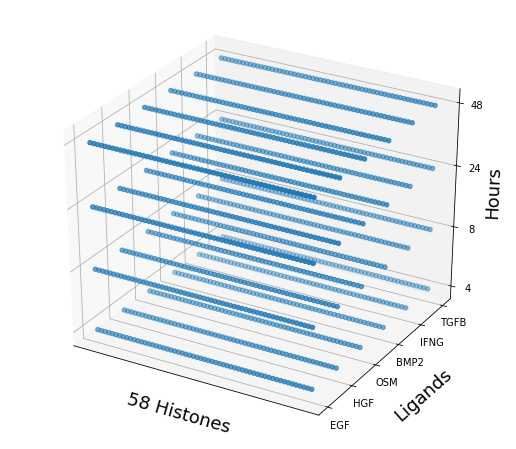

In [73]:
# construct the 3-way tensor
# matrices_gcp = []
# for idx, data in gcp_averaged.groupby(level=0):
#     matrices_gcp.append(data.to_numpy())
tensor_gcp_T = np.transpose(tensor_gcp,[2,1,0])
print('tensor size:',tensor_gcp_T.shape)
x,y,z = tensor_gcp_T.nonzero()
fig = plt.figure(figsize=(9,8))
fig.clf()
ax = fig.add_subplot(111, projection='3d')
ax.set_xticks([])
# ax.set_yticks([0,1,2,3,4,5])
# ax.set_zticks([0,1,2,3,4])
ax.set(yticks=range(tensor_gcp_T.shape[1]), yticklabels=ligand_names_gcp,
       zticks=range(tensor_gcp_T.shape[2]), zticklabels=['4','8','24','48']) 
ax.set_xlabel(str(tensor_gcp_T.shape[0])+' Histones', fontsize=18)
ax.set_ylabel('Ligands', fontsize=18)
ax.yaxis.labelpad=15
ax.set_zlabel('Hours', fontsize=18)
c = (z<=0)
ax.scatter(x, y, z, cmap='cm.coolwarm')

In [74]:
from numpy.linalg import norm
def compute_namda(A, B, C):
    K = A.shape[1]
    namda = 1
    for r in range(K):
        A_r = A[:,r]
        B_r = B[:,r]
        C_r = C[:,r]
        namda *= norm(A_r)*norm(B_r)*norm(C_r)
    return namda

In [75]:
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
importr('multiway')
parafac = robjects.r["parafac"]
corcondia = robjects.r["corcondia"]
import tensorly as tl

tensor_gcp_t =  np.transpose(tensor_gcp,[0,2,1])

# # Usage: corcondia(tensor, components = 1)
# cc_values = {}
# for k in range(1, 50):
#     cc_values[k] = corcondia(dtensor(tensor_gcp_t), components = k)
    
    
iters = 100
num_k = 11
start = 2
cc_values = {}
cc_factors = {}
for i in range(iters):
    for k in range(start, num_k):
        pfac = parafac(tensor_gcp_t, nfac=k, nstart=1, output='best')
        A_f = np.array(pfac[pfac.names.index('A')])
        B_f = np.array(pfac[pfac.names.index('B')])
        C_f = np.array(pfac[pfac.names.index('C')])
        namda = compute_namda(A_f, B_f, C_f)
        if k not in cc_values.keys():
            cc_values[k] = [corcondia(tensor_gcp_t, pfac, divisor = ["core", "nfac"])[0]]
            cc_factors[k] = [namda]
        else:
            cc_values[k].append(corcondia(tensor_gcp_t, pfac, divisor = ["core", "nfac"])[0])
            cc_factors[k].append(namda)

In [76]:
import statistics 
top_k = 20
ys = []
ys_average = []
for k in range(start, num_k):
    ccvs = np.array(cc_values[k])
    ccfs = np.array(cc_factors[k])
    top_ccs = rank_k(ccvs, ccfs, top_k)
    ys.append(top_ccs)
    ys_average.append(statistics.mean(top_ccs))
    print(k, top_ccs)
ys = np.array(ys)

2 [98.28815527 98.3536565  98.39065575 98.63679461 98.66667729 98.70608141
 98.72150421 98.75539122 98.84477856 98.91105032 99.01229219 99.08683983
 99.16167151 99.16799767 99.19928684 99.24144687 99.27005503 99.29674728
 99.30233038 99.42260565]
3 [20.96901829 21.04224649 22.95348454 24.24143306 24.5613113  24.77700506
 24.95303055 25.26050034 25.37644839 27.39311708 27.5098015  27.77878387
 28.19013901 28.26472008 28.45545675 28.8184158  29.3016852  34.84465318
 46.17843329 46.59151243]
4 [1.60321396 1.65911773 1.66411234 1.66927773 1.75649539 1.92320365
 1.96765547 2.03378845 2.74525058 2.79119938 2.91304321 3.2027229
 3.70084547 3.8764426  3.89141723 4.73644211 4.7620182  4.86245965
 5.15340492 5.75086632]
5 [0.66071019 0.66606507 0.68922129 0.70225249 0.72551655 0.74570163
 0.75049674 0.97432167 1.25410883 1.37276952 1.40939009 1.42186744
 1.5569955  1.61702001 1.7673926  2.02966715 2.20002677 2.78351971
 3.38065954 7.6372422 ]
6 [0.6546547  0.66829137 0.76119957 0.82804906 0.8793

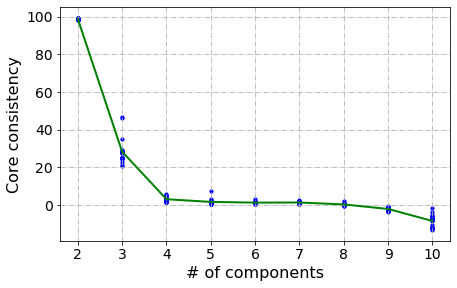

In [77]:
xs = np.array([list(range(start, num_k))] * top_k).T
xs_average = list(range(start, num_k))
# xs
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.scatter(xs, ys, 10, c='blue')

linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(xs_average, ys_average, color="green", **linestyle, fmt='-')

plt.xlabel("# of components", fontsize=16)
plt.ylabel("Core consistency", fontsize=16)
plt.grid(linestyle='-.')

In [78]:
pairs = pd.DataFrame([xs_average,ys_average])
# pairs = pairs.set_index(0).rename_axis(None)
# pairs.columns = [[''],['']]
print("Number of K vs. Core consistency")
pairs

Number of K vs. Core consistency


,0,1,2,3,4,5,6,7,8
0,2.000000,3.00000,4.000000,5.000000,6.0000,7.000000,8.000000,9.000000,10.000000
1,98.921801,28.37306,3.133149,1.717247,1.3284,1.402628,0.365811,-2.029576,-8.405561


## none-negative tensor decomposition

## Based on above curve, we choose K=2

In [79]:
import tensorly as tl
from tensorly.decomposition import non_negative_parafac

num_component = 2
print('tensor{}'.format(tensor_gcp_t.shape),'= component_1 + component_2 + ... + component_{}= [A,B,C]'.format(num_component))
weights, factors = non_negative_parafac(tl.tensor(tensor_gcp_t, dtype=tl.float32), rank=num_component, init='svd')


tensor(4, 58, 6) = component_1 + component_2 + ... + component_2= [A,B,C]


In [80]:
from numpy.linalg import norm
def compute_namda(A, B, C):
    K = A.shape[1]
    namda = 1
    for r in range(K):
        A_r = A[:,r]
        B_r = B[:,r]
        C_r = C[:,r]
        namda *= norm(A_r)*norm(B_r)*norm(C_r)
    return namda

In [81]:
import sktensor
from sktensor import dtensor
import ncp
from ncp import nonnegative_tensor_factorization

num_component_gcp = 2

X_gcp = dtensor(tensor_gcp_t) 

print(X_gcp.shape)

init_factors_gcp = init_nnsvd(X_gcp, num_component)

# np.random.seed(4)
X_approx_ks_gcp = ncp.nonnegative_tensor_factorization(X_gcp, num_component_gcp, method='anls_bpp', 
                                                   init=init_factors_gcp)

C_gcp = X_approx_ks_gcp.U[0]
A_gcp = X_approx_ks_gcp.U[1]
B_gcp = X_approx_ks_gcp.U[2]
print('[A,B,C]:', A_gcp.shape, B_gcp.shape, C_gcp.shape)

# print(B_gcp)

(4, 58, 6)
4 348
58 24
6 232
[A,B,C]: (58, 2) (6, 2) (4, 2)


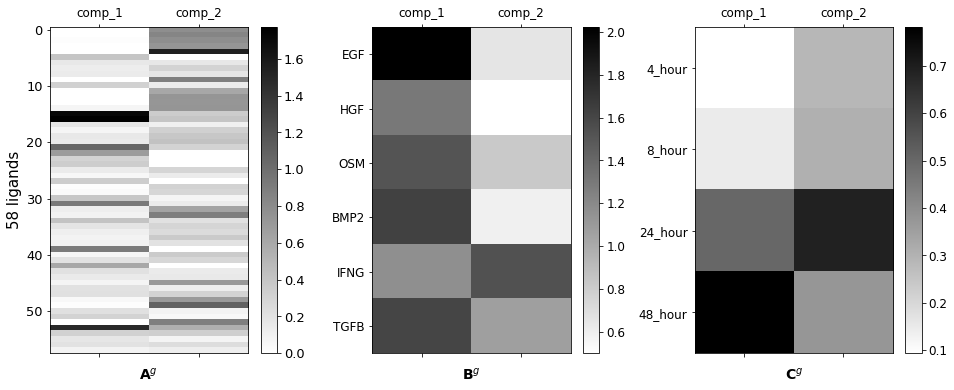

In [82]:
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace=0, wspace=0.3)

ax1 = fig.add_subplot(131)
cax1 = ax1.matshow(A_gcp,cmap=plt.cm.gray_r)
ax1.set_aspect('auto')
ax1.set_title('$\mathbf{A}^g$', y=-0.1,fontsize=14)
fig.colorbar(cax1)
plt.rc('ytick',labelsize=12)
ax1.set_ylabel(str(tensor_gcp_t.shape[1])+' ligands', size=(15))
ax1.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'], fontsize=12)

ax2 = fig.add_subplot(132)
cax2 = ax2.matshow(B_gcp,cmap=plt.cm.gray_r)
ax2.set_aspect('auto')
ax2.set_title('$\mathbf{B}^g$', y=-0.1,fontsize=14)
fig.colorbar(cax2)
plt.rc('ytick',labelsize=12)
# ax2.set_ylabel(str(tensor.shape[2])+" ligands", size=(13))
ax2.set_yticklabels(['','EGF', 'HGF', 'OSM', 'BMP2', 'IFNG', 'TGFB'])
ax2.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'], fontsize=12)

ax3 = fig.add_subplot(133)
cax3 = ax3.matshow(C_gcp,cmap=plt.cm.gray_r)
ax3.set_aspect('auto')
plt.rc('ytick',labelsize=12)
ax3.set_title('$\mathbf{C}^g$', y=-0.1,fontsize=14)
# ax3.set_ylabel(tensor.shape[0], size=(13))
ax3.set_yticklabels(['','4_hour','8_hour','24_hour','48_hour'])
ax3.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'], fontsize=12)

fig.colorbar(cax3)

In [84]:
component_preds_gcp = A_gcp.argmax(axis=1) # classify proteins into respective components based on the largest membership values
print('{} histones in total, each protein belongs to a predicted component with the largest membership value:\n\n'.format(A_gcp.shape[0]), component_preds_gcp)

component_preds_B_gcp = B_gcp.argmax(axis=1) # classify proteins into respective components based on the largest membership values
print('{} ligands in total, each ligand belongs to a predicted component with the largest membership value:\n\n'.format(B_gcp.shape[0]), component_preds_B_gcp)


58 histones in total, each protein belongs to a predicted component with the largest membership value:

 [1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1
 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1]
6 ligands in total, each ligand belongs to a predicted component with the largest membership value:

 [0 0 0 0 1 0]


['0~20', '21~57']
(6, 58, 4)


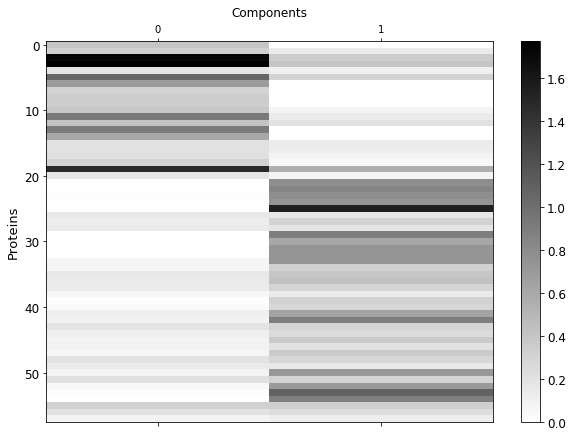

In [85]:
# rerange the proteins in matrix A
new_indexes = []
clusters_gcp = []
for k in range(num_component):
    idx = np.where(component_preds_gcp == k)[0]
    new_indexes.extend(idx)
    clusters_gcp.append(idx)

clustre_id_ranges = []
count = 0
for clu in clusters_gcp:
    id_range = str(count) + '~' + str(count+len(clu)-1)
    clustre_id_ranges.append(id_range)
    count += len(clu)
print(clustre_id_ranges)

# rank communities as a diagonal matrix
A_ranked_gcp = A_gcp[new_indexes]
histone_names_ranked = histone_names[new_indexes]
tensor_gcp_binary = gcp_averaged_binary.to_numpy()[new_indexes].reshape([gcp_averaged.shape[1],4,6]).transpose([2, 0, 1])
print(tensor_gcp_binary.shape)

fig = plt.figure(figsize=(10,7))
# fig.subplots_adjust(hspace=0, wspace=0.3)
ax = fig.add_subplot(111)
aa = ax.matshow(A_ranked_gcp,cmap=plt.cm.gray_r)
ax.set_aspect('auto')
ax.set_title('Components')
ax.set_ylabel('Proteins', size=(13))
ax.set_xticks(range(0,num_component))
fig.colorbar(aa)

In [86]:
for k in range(len(clusters_gcp)):
    histones = ' '.join(histone_names[clusters_gcp[k]])
    print('Histone cluster {}: {}\n'.format(k, histones))

Histone cluster 0: H3K9me0K14ac0  H3K9me0K14ac1  H3K9me2S10ph1K14ac0  H3K9me3S10ph1K14ac0  H3K18ac0K23ac0  H3K18ub1K23ac0  H3K27me0K36me0  H3K27me1K36me0  H3K27me1K36me1  H3K27me2K36me2  H3K27me3K36me2  H3K27ac1K36me1  H3.3K27me0K36me0  H3K27me0K36me1  H4(4to17)K5ac1me0 H4(4to17)K12ac1me0 H4(4to17)K5ac1K8ac1me0 H4(4to17)K5ac1K8ac1K12ac1me0 H4(4to17)K5ac1K8ac1K16ac1me0 H4(20to23)K20me0 H4(20to23)K20me2

Histone cluster 1: H3K4me0  H3K4me1  H3K4me2  H3K4me3  H3K4ac1  H3K9me1K14ac0  H3K9me2K14ac0  H3K9me3K14ac0  H3K9ac1K14ac0  H3K9me1K14ac1  H3K9me2K14ac1  H3K9me3K14ac1  H3K9ac1K14ac1  H3K18ac1K23ac0  H3K18ac0K23ac1  H3K18ac1K23ac1  H3K27me1K36me2  H3K27me2K36me1  H3K27me3K36me0  H3K27me3K36me1  H3K27ac1K36me2  H3K27ac1K36me3  H3K56me0  H3K79me0  H3K79me1  H3K79me2  H3K27me0K36me2  H4(4to17)ac0me0 H4(4to17)K16ac1me0 H4(4to17)K8ac1K12ac1me0 H4(4to17)K5ac1K16ac1me0 H4(4to17)K12ac1K16ac1me0 H4(4to17)K8ac1K12ac1K16ac1me0 H4(4to17)K5ac1K8ac1K12ac1K16ac1me0 H4(20to23)K20me1 H4(20to23)K20me3 H4(

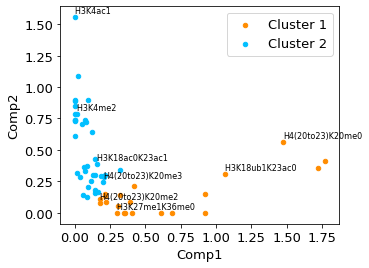

In [410]:
fig = plt.figure(figsize=(5,4))
colss = ['darkorange','deepskyblue']
for k in range(len(clusters_gcp)):
    plt.scatter(A_gcp[clusters_gcp[k], 0], A_gcp[clusters_gcp[k], 1], c=colss[k], s=20,label='Cluster '+str(k+1))

for v in np.random.choice(clusters_gcp[0],4):
#     if A_gcp[v, 0] > 0.6:
        plt.text(A_gcp[v, 0], A_gcp[v, 1]+.03, histone_names[v], fontsize=8)
for v in np.random.choice(clusters_gcp[1],4):
#     if A_gcp[v, 1] > 0.9:
        plt.text(A_gcp[v, 0], A_gcp[v, 1]+.03, histone_names[v], fontsize=8)
        
plt.xticks(fontsize=13)
plt.xlabel('Comp1', fontsize=13)
plt.ylabel('Comp2', fontsize=13)
plt.legend(fontsize=13)    

[15, 8, 2, 13, 44, 36, 31, 34]
['H3K9me0K14ac0 ', 'H3K9me0K14ac1 ', 'H3K9me2S10ph1K14ac0 ', 'H3K9me3S10ph1K14ac0 ', 'H3K18ac0K23ac0 ', 'H3K18ub1K23ac0 ', 'H3K27me0K36me0 ', 'H3K27me1K36me0 ', 'H3K27me1K36me1 ', 'H3K27me2K36me2 ', 'H3K27me3K36me2 ', 'H3K27ac1K36me1 ', 'H3.3K27me0K36me0 ', 'H3K27me0K36me1 ', 'H4(4to17)K5ac1me0', 'H4(4to17)K12ac1me0', 'H4(4to17)K5ac1K8ac1me0', 'H4(4to17)K5ac1K8ac1K12ac1me0', 'H4(4to17)K5ac1K8ac1K16ac1me0', 'H4(20to23)K20me0', 'H4(20to23)K20me2', 'H3K4me0 ', 'H3K4me1 ', 'H3K4me2 ', 'H3K4me3 ', 'H3K4ac1 ', 'H3K9me1K14ac0 ', 'H3K9me2K14ac0 ', 'H3K9me3K14ac0 ', 'H3K9ac1K14ac0 ', 'H3K9me1K14ac1 ', 'H3K9me2K14ac1 ', 'H3K9me3K14ac1 ', 'H3K9ac1K14ac1 ', 'H3K18ac1K23ac0 ', 'H3K18ac0K23ac1 ', 'H3K18ac1K23ac1 ', 'H3K27me1K36me2 ', 'H3K27me2K36me1 ', 'H3K27me3K36me0 ', 'H3K27me3K36me1 ', 'H3K27ac1K36me2 ', 'H3K27ac1K36me3 ', 'H3K56me0 ', 'H3K79me0 ', 'H3K79me1 ', 'H3K79me2 ', 'H3K27me0K36me2 ', 'H4(4to17)ac0me0', 'H4(4to17)K16ac1me0', 'H4(4to17)K8ac1K12ac1me0', 'H4(4

[Text(0, 1, ''),
 Text(0, 1, 'Cluster 1'),
 Text(0, 1, 'Cluster 2'),
 Text(0, 1, 'comp_3')]

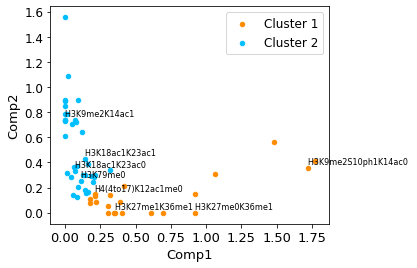

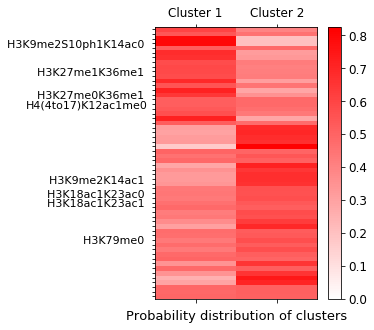

In [931]:
component_preds_gcp_ranked = A_ranked_gcp.argmax(axis=1)
clusters_gcp_ranked = []
for k in range(num_component):
    idx = np.where(component_preds_gcp_ranked == k)[0]
    clusters_gcp_ranked.append(idx)
    

fig = plt.figure(figsize=(5,4))
# fig.subplots_adjust(hspace=0, wspace=1.1)

# ax = fig.add_subplot(121)
colss = ['darkorange','deepskyblue']
for k in range(len(clusters_gcp_ranked)):
    plt.scatter(A_ranked_gcp[clusters_gcp_ranked[k], 0], A_ranked_gcp[clusters_gcp_ranked[k], 1], c=colss[k], s=20,label='Cluster '+str(k+1))

show_ids = []
for v in np.random.choice(clusters_gcp_ranked[0],4, replace=False):
#     if A_gcp[v, 0] > 0.6:
        plt.text(A_ranked_gcp[v, 0], A_ranked_gcp[v, 1]+.03, histone_names_ranked[v], fontsize=8)
        show_ids.append(v)
for v in np.random.choice(clusters_gcp_ranked[1],4, replace=False):
#     if A_gcp[v, 1] > 0.9:
        plt.text(A_ranked_gcp[v, 0], A_ranked_gcp[v, 1]+.03, histone_names_ranked[v], fontsize=8)
        show_ids.append(v)
        
plt.xticks(fontsize=13)
plt.xlabel('Comp1', fontsize=13)
plt.ylabel('Comp2', fontsize=13)
plt.legend(fontsize=12)   

print(show_ids)

from scipy.special import softmax

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(122)
cax1 = ax1.matshow(softmax(A_ranked_gcp,axis=1),cmap='bwr',norm = colors.DivergingNorm(vcenter=0))
ax1.set_aspect('auto')
ax1.set_title('Probability distribution of clusters', y=-0.1,fontsize=13)
fig.colorbar(cax1)
plt.rc('ytick',labelsize=12)

ax1.set_yticks(range(len(histone_names_ranked)))
# loc = plticker.MultipleLocator(base=3) # this locator puts ticks at regular intervals
# ax1.yaxis.set_major_locator(loc)
show_histone_names = histone_names_ranked.to_list()
print(show_histone_names)
for i in range(len(show_histone_names)):
    if i not in show_ids:
        show_histone_names[i] = ''
show_histone_names = [''] + show_histone_names
ax1.set_yticklabels(show_histone_names, fontsize=11)

ax1.set_xticklabels(['','Cluster 1', 'Cluster 2', 'comp_3'],fontsize=12)

['H3K9me0K14ac0 ', 'H3K9me0K14ac1 ', 'H3K9me2S10ph1K14ac0 ', 'H3K9me3S10ph1K14ac0 ', 'H3K18ac0K23ac0 ', 'H3K18ub1K23ac0 ', 'H3K27me0K36me0 ', 'H3K27me1K36me0 ', 'H3K27me1K36me1 ', 'H3K27me2K36me2 ', 'H3K27me3K36me2 ', 'H3K27ac1K36me1 ', 'H3.3K27me0K36me0 ', 'H3K27me0K36me1 ', 'H4(4to17)K5ac1me0', 'H4(4to17)K12ac1me0', 'H4(4to17)K5ac1K8ac1me0', 'H4(4to17)K5ac1K8ac1K12ac1me0', 'H4(4to17)K5ac1K8ac1K16ac1me0', 'H4(20to23)K20me0', 'H4(20to23)K20me2', 'H3K4me0 ', 'H3K4me1 ', 'H3K4me2 ', 'H3K4me3 ', 'H3K4ac1 ', 'H3K9me1K14ac0 ', 'H3K9me2K14ac0 ', 'H3K9me3K14ac0 ', 'H3K9ac1K14ac0 ', 'H3K9me1K14ac1 ', 'H3K9me2K14ac1 ', 'H3K9me3K14ac1 ', 'H3K9ac1K14ac1 ', 'H3K18ac1K23ac0 ', 'H3K18ac0K23ac1 ', 'H3K18ac1K23ac1 ', 'H3K27me1K36me2 ', 'H3K27me2K36me1 ', 'H3K27me3K36me0 ', 'H3K27me3K36me1 ', 'H3K27ac1K36me2 ', 'H3K27ac1K36me3 ', 'H3K56me0 ', 'H3K79me0 ', 'H3K79me1 ', 'H3K79me2 ', 'H3K27me0K36me2 ', 'H4(4to17)ac0me0', 'H4(4to17)K16ac1me0', 'H4(4to17)K8ac1K12ac1me0', 'H4(4to17)K5ac1K16ac1me0', 'H4(4to17

[Text(0, 1, ''),
 Text(0, 1, 'Cluster 1'),
 Text(0, 1, 'Cluster 2'),
 Text(0, 1, 'comp_3')]

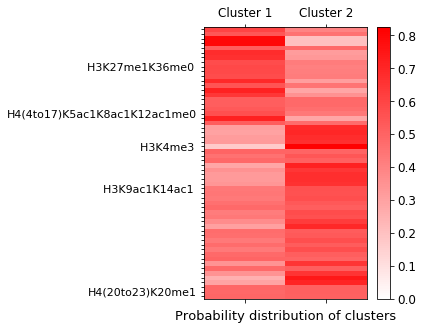

In [87]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(122)
cax1 = ax1.matshow(softmax(A_ranked_gcp,axis=1),cmap='bwr',norm = colors.DivergingNorm(vcenter=0))
ax1.set_aspect('auto')
ax1.set_title('Probability distribution of clusters', y=-0.1,fontsize=13)
fig.colorbar(cax1)
plt.rc('ytick',labelsize=12)

ax1.set_yticks(range(len(histone_names_ranked)))
# loc = plticker.MultipleLocator(base=3) # this locator puts ticks at regular intervals
# ax1.yaxis.set_major_locator(loc)
show_histone_names = histone_names_ranked.to_list()
print(show_histone_names)
for i in range(len(show_histone_names)):
    if i not in show_ids:
        show_histone_names[i] = ''
show_histone_names = [''] + show_histone_names
ax1.set_yticklabels(show_histone_names, fontsize=11)

ax1.set_xticklabels(['','Cluster 1', 'Cluster 2', 'comp_3'],fontsize=12)

In [88]:
new_indexes_B = []
clusters_B = []
for k in range(num_component):
    idx = np.where(component_preds_B_gcp == k)[0]
    new_indexes_B.extend(idx)
    clusters_B.append(idx)

clustre_id_ranges_B = []
count = 0
for clu in clusters_B:
    id_range = str(count) + '~' + str(count+len(clu)-1)
    clustre_id_ranges_B.append(id_range)
    count += len(clu)
print(clustre_id_ranges_B)

# rank communities as a diagonal matrix
B_ranked_gcp = B_gcp#[new_indexes_B]
ligand_names_gcp = np.array(ligand_names_gcp)
ligand_names_ranked_gcp = ligand_names_gcp#[new_indexes_B]
B_ranked_gcp
ligand_names_ranked_gcp


['0~4', '5~5']


array(['EGF', 'HGF', 'OSM', 'BMP2', 'IFNG', 'TGFB'], dtype='<U4')

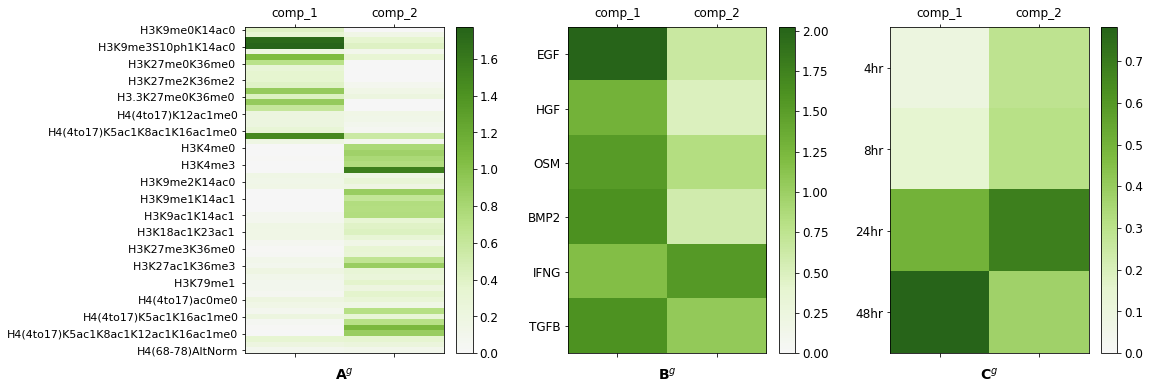

In [90]:
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace=0, wspace=0.3)

ax1 = fig.add_subplot(131)
cax1 = ax1.matshow(A_ranked_gcp,cmap='PiYG',norm = colors.DivergingNorm(vcenter=0))
ax1.set_aspect('auto')
ax1.set_title('$\mathbf{A}^g$', y=-0.1,fontsize=14)
fig.colorbar(cax1)
plt.rc('ytick',labelsize=12)
# ax1.set_ylabel(str(tensor_gcp_t.shape[1])+' histones', size=(15))

ax1.set_yticks(range(len(histone_names_ranked)))
loc = plticker.MultipleLocator(base=3) # this locator puts ticks at regular intervals
ax1.yaxis.set_major_locator(loc)
show_histone_names = histone_names_ranked[range(0, len(histone_names_ranked), 3)].insert(0,'')
ax1.set_yticklabels(show_histone_names, fontsize=11)

ax1.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'],fontsize=12)

ax2 = fig.add_subplot(132)
cax2 = ax2.matshow(B_ranked_gcp,cmap='PiYG',norm = colors.DivergingNorm(vcenter=0))
ax2.set_aspect('auto')
ax2.set_title('$\mathbf{B}^g$', y=-0.1,fontsize=14)
plt.rc('ytick',labelsize=12)
fig.colorbar(cax2)
# ax2.set_ylabel(str(tensor.shape[2])+" ligands", size=(13))
lnr = ['','EGF', 'HGF', 'OSM', 'BMP2', 'IFNG', 'TGFB']
ax2.set_yticklabels(lnr)
ax2.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'],fontsize=12)

ax3 = fig.add_subplot(133)
cax3 = ax3.matshow(C_gcp,cmap='PiYG',norm = colors.DivergingNorm(vcenter=0))
ax3.set_aspect('auto')
ax3.set_title('$\mathbf{C}^g$', y=-0.1,fontsize=14)
plt.rc('ytick',labelsize=12)
# ax3.set_ylabel(tensor.shape[0], size=(13))
ax3.set_yticklabels(['', '4hr','8hr','24hr','48hr'])
ax3.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'],fontsize=12)

fig.colorbar(cax3)

In [91]:
# save the A,B and C matrices
A_out = pd.DataFrame(data=A_ranked_gcp, index=histone_names_ranked, columns=['com_1','com_2'])
B_out = pd.DataFrame(data=B_ranked_gcp, index=ligand_names_ranked_gcp, columns=['com_1','com_2'])
C_out = pd.DataFrame(data=C_gcp, index=['4_hour','8_hour','24_hour','48_hour'], columns=['com_1','com_2'])


writer = pd.ExcelWriter("dataset/tumour_microenv_results_2020-9/gcp/Factors_gcp_ncp.xlsx")

A_out.to_excel(writer, "A")
B_out.to_excel(writer, "B")
C_out.to_excel(writer, "C")

writer.save()

## Fold Change Pattern mining

# combine A and B to calculate M1=AB_T

(58, 6)
mean:0.7595176746825076, std:0.6322313270459726


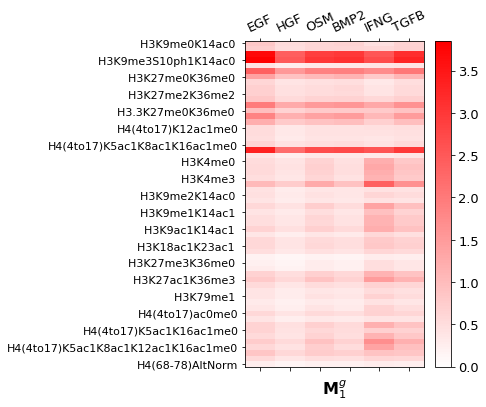

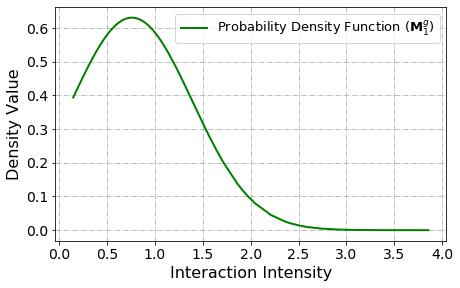

In [92]:
B_expand_gcp = np.expand_dims(B_ranked_gcp, axis=1)
patterns_AB_gcp = np.sum(np.transpose(np.multiply(A_ranked_gcp, B_expand_gcp), [1,0,2]), axis=2)
print(patterns_AB_gcp.shape)

fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
aa = ax.matshow(patterns_AB_gcp,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
ax.set_aspect('auto')
# ax.set_title('Components')
# ax.set_ylabel(str(tensor_gcp_t.shape[1])+' histones', size=(16))

ax.set_yticks(range(len(histone_names_ranked)))
loc = plticker.MultipleLocator(base=3) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)
show_histone_names = histone_names_ranked[range(0, len(histone_names_ranked), 3)].insert(0,'')
ax.set_yticklabels(show_histone_names, fontsize=11)


plt.rc('ytick',labelsize=13)

# ax.set_xticks(range(0,num_component))
ax.set_xticklabels(lnr, fontsize=13, rotation =25)
ax.set_title('$\mathbf{M}_1^g$', y=-0.1, fontsize=16)
fig.colorbar(aa)

# fitting the data with a gaussian distribution
from scipy.stats import norm
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)

flatten_AB_gcp = patterns_AB_gcp.flatten()
flatten_AB_gcp.sort()
mean, std = norm.fit(flatten_AB_gcp)
print('mean:{}, std:{}'.format(mean, std))

fitted_pdf_gcp = norm.pdf(flatten_AB_gcp, loc=mean, scale=std)
linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(flatten_AB_gcp, fitted_pdf_gcp, color="green", **linestyle, fmt='-')
plt.xlabel("Interaction Intensity", fontsize=16)
plt.ylabel("Density Value", fontsize=16)
plt.legend(['Probability Density Function ($\mathbf{M}_1^g$)'], fontsize=13)
plt.grid(linestyle='-.')


writer_intensity_gcp = pd.ExcelWriter("dataset/tumour_microenv_results_2020-9/gcp/Intensity_dist_gcp_ncp.xlsx")

intense_density = np.concatenate([flatten_AB_gcp, fitted_pdf_gcp]).reshape(2,flatten_AB_gcp.shape[0]).transpose([1,0])
intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
intense_density_mat.loc[-1] = [mean, std]
intense_density_mat.index = intense_density_mat.index + 1
intense_density_mat = intense_density_mat.sort_index()
intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
intense_density_mat.to_excel(writer_intensity_gcp, "M1_AB")
writer_intensity_gcp.save()

# end_ind = 16
# patterns_AB_part_gcp = patterns_AB_gcp[:end_ind]

# num_protein_gcp = patterns_AB_gcp.shape[0]
# pairs = pd.DataFrame(data=patterns_AB_part_gcp, index=range(end_ind), columns=ligand_names_ranked_gcp)
# s = pd.Series(range(end_ind))
# pairs= pairs.set_index([s, histone_names_ranked[s]])
# pairs

# combine A and C to calculate M2=AC_T

In [93]:
from matplotlib import colors

C_expand_gcp = np.expand_dims(C_gcp, axis=1)
patterns_AC_gcp = np.sum(np.transpose(np.multiply(A_ranked_gcp, C_expand_gcp), [1,0,2]), axis=2)
print(patterns_AC_gcp.shape)

patterns_AC_gcp_pairs_new = pd.DataFrame(data=patterns_AC_gcp, index=histone_names_ranked, 
                                     columns=['4_hour','8_hour','24_hour','48_hour'])

(58, 4)


(58, 4)
mean:0.2640572910187846, std:0.23999765594951666


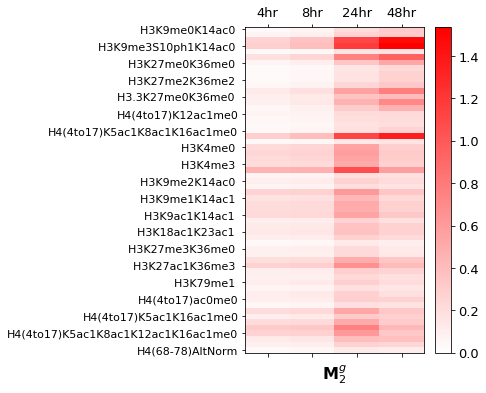

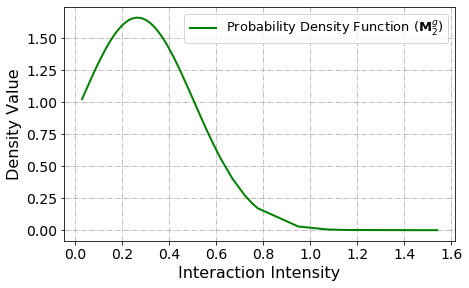

In [94]:
C_expand_gcp = np.expand_dims(C_gcp, axis=1)
patterns_AC_gcp = np.sum(np.transpose(np.multiply(A_ranked_gcp, C_expand_gcp), [1,0,2]), axis=2)
print(patterns_AC_gcp.shape)

fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
aa = ax.matshow(patterns_AC_gcp,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
ax.set_aspect('auto')
# ax.set_title('Components')
# ax.set_ylabel(str(tensor_gcp_t.shape[1])+' histones', size=(16))

ax.set_yticks(range(len(histone_names_ranked)))
loc = plticker.MultipleLocator(base=3) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)
show_histone_names = histone_names_ranked[range(0, len(histone_names_ranked), 3)].insert(0,'')
ax.set_yticklabels(show_histone_names, fontsize=11)

# ax.set_xticks(range(0,num_component))
ax.set_xticklabels(['', '4hr','8hr','24hr','48hr'], fontsize=13)
ax.set_title('$\mathbf{M}_2^g$', y=-0.1, fontsize=16)
plt.rc('ytick',labelsize=13)
fig.colorbar(aa)

# fitting the data with a gaussian distribution
from scipy.stats import norm
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)

flatten_AC_gcp = patterns_AC_gcp.flatten()
flatten_AC_gcp.sort()
mean, std = norm.fit(flatten_AC_gcp)
print('mean:{}, std:{}'.format(mean, std))

fitted_pdf_gcp = norm.pdf(flatten_AC_gcp, loc=mean, scale=std)
linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(flatten_AC_gcp, fitted_pdf_gcp, color="green", **linestyle, fmt='-')
plt.xlabel("Interaction Intensity", fontsize=16)
plt.ylabel("Density Value", fontsize=16)
plt.legend(['Probability Density Function ($\mathbf{M}_2^g$)'], fontsize=13)
plt.grid(linestyle='-.')

intense_density = np.concatenate([flatten_AC_gcp, fitted_pdf_gcp]).reshape(2,flatten_AC_gcp.shape[0]).transpose([1,0])
intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
intense_density_mat.loc[-1] = [mean, std]
intense_density_mat.index = intense_density_mat.index + 1
intense_density_mat = intense_density_mat.sort_index()
intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
intense_density_mat.to_excel(writer_intensity_gcp, "M2_AC")
writer_intensity_gcp.save()

In [95]:
ligand_names_ranked_gcp

array(['EGF', 'HGF', 'OSM', 'BMP2', 'IFNG', 'TGFB'], dtype='<U4')

(58, 4)
EGF, mean:0.011756499652434117, std:0.356632741790997
HGF, mean:0.09931713620398135, std:0.34272617970864366
OSM, mean:0.005343753218151496, std:0.3567864516808131
BMP2, mean:0.035706965519772475, std:0.3550354072692067
IFNG, mean:-0.038615295452629296, std:0.35473086524652436
TGFB, mean:-0.0073773385668441825, std:0.35675019646401296


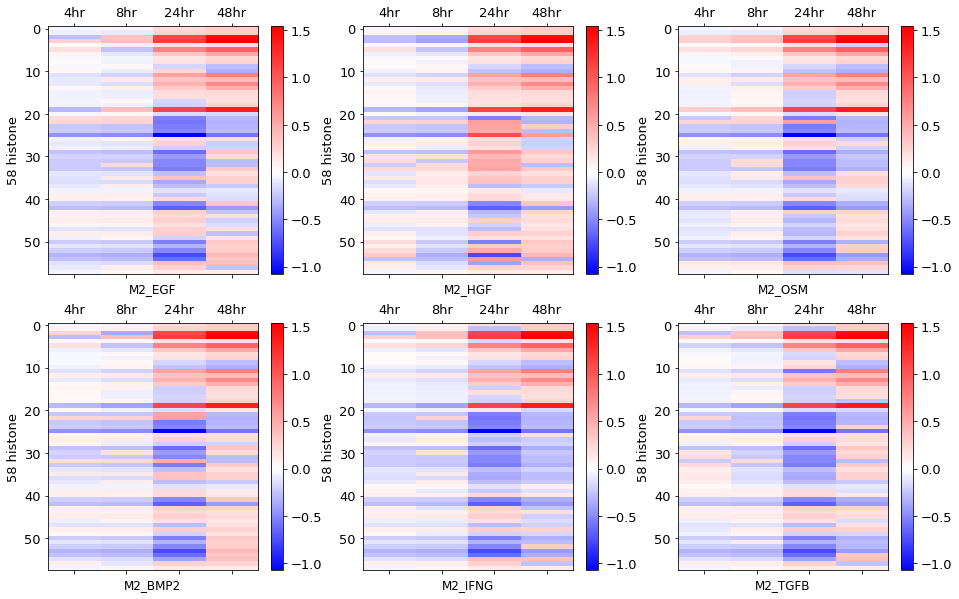

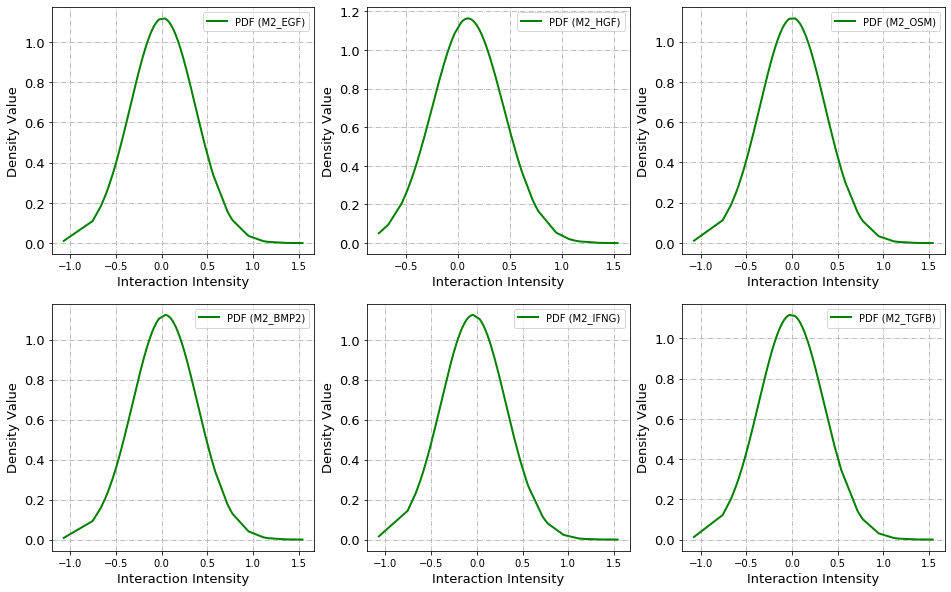

In [96]:
from matplotlib import colors

C_expand_gcp = np.expand_dims(C_gcp, axis=1)
patterns_AC_gcp = np.sum(np.transpose(np.multiply(A_ranked_gcp, C_expand_gcp), [1,0,2]), axis=2)
print(patterns_AC_gcp.shape)

patterns_AC_gcp_by_lignad = tensor_gcp_binary * patterns_AC_gcp

norm = colors.DivergingNorm(vcenter=0)
fig = plt.figure(figsize=(16,10))
plt.set_cmap('bwr')
for i in range(patterns_AC_by_lignad.shape[0]):
    ax = fig.add_subplot(2,3,i+1)
    aa = ax.matshow(patterns_AC_gcp_by_lignad[i], norm=norm)
    ax.set_aspect('auto')
    ax.set_ylabel(str(tensor_gcp_T.shape[0])+' histone', size=(13))
    ax.set_xticklabels(['','4hr','8hr','24hr','48hr'], fontsize=13)
    ax.set_title('M2_'+str(ligand_names_ranked_gcp[i]), y=-0.1)
    fig.colorbar(aa)
    
from scipy.stats import norm

fig = plt.figure(figsize=(16,10))
plt.set_cmap('bwr')
for i in range(patterns_AC_gcp_by_lignad.shape[0]):
    ax = fig.add_subplot(2,3,i+1)
#     ax.tick_params(axis='both', which='major', labelsize=14)
    flatten_AC_gcp = patterns_AC_gcp_by_lignad[i].flatten()
    flatten_AC_gcp.sort()
    mean, std = norm.fit(flatten_AC_gcp)
    print('{}, mean:{}, std:{}'.format(ligand_names_ranked_gcp[i], mean, std))
    fitted_pdf = norm.pdf(flatten_AC_gcp, loc=mean, scale=std)
    
    
    intense_density = np.concatenate([flatten_AC_gcp, fitted_pdf]).reshape(2,flatten_AC_gcp.shape[0]).transpose([1,0])
    intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
    intense_density_mat.loc[-1] = [mean, std]
    intense_density_mat.index = intense_density_mat.index + 1
    intense_density_mat = intense_density_mat.sort_index()
    intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
    intense_density_mat.to_excel(writer_intensity_gcp, "M2_AC_per_ligand_"+ligand_names_ranked_gcp[i])
    writer_intensity_gcp.save()
    
    linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
    plt.errorbar(flatten_AC_gcp, fitted_pdf, color="green", **linestyle, fmt='-')
    plt.xlabel("Interaction Intensity", fontsize=13)
    plt.ylabel("Density Value", fontsize=13)
    plt.legend(['PDF (M2_'+str(ligand_names_ranked_gcp[i])+")"])
    plt.grid(linestyle='-.')


# combine B and C to calculate M3=BC_T

(6, 4)
mean:0.9478726453194503, std:0.5319166772359678


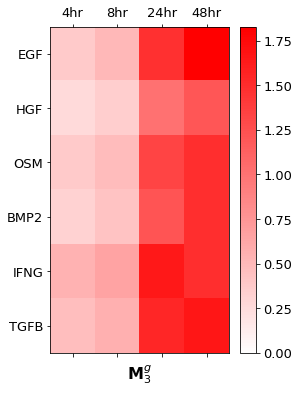

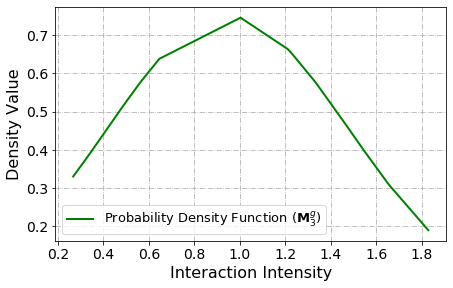

In [97]:
C_expand_gcp = np.expand_dims(C_gcp, axis=1)
patterns_BC_gcp = np.sum(np.transpose(np.multiply(B_ranked_gcp, C_expand_gcp), [1,0,2]), axis=2)
print(patterns_BC_gcp.shape)

fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
aa = ax.matshow(patterns_BC_gcp,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
ax.set_aspect('auto')
# ax.set_title('Components')
# ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(13))
# ax.set_xticks(range(0,num_component))
ax.set_yticklabels(lnr, fontsize=13)
# plt.rc('ytick',fontsize=13)
ax.set_xticklabels(['','4hr','8hr','24hr','48hr'], fontsize=13)
ax.set_title('$\mathbf{M}_3^g$', y=-0.1, fontsize=16)
fig.colorbar(aa)

# fitting the data with a gaussian distribution
from scipy.stats import norm
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)

flatten_BC_gcp = patterns_BC_gcp.flatten()
flatten_BC_gcp.sort()
mean, std = norm.fit(flatten_BC_gcp)
print('mean:{}, std:{}'.format(mean, std))

fitted_pdf_gcp = norm.pdf(flatten_BC_gcp, loc=mean, scale=std)
linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(flatten_BC_gcp, fitted_pdf_gcp, color="green", **linestyle, fmt='-')
plt.xlabel("Interaction Intensity", fontsize=16)
plt.ylabel("Density Value", fontsize=16)
plt.legend(['Probability Density Function ($\mathbf{M}_3^g$)'], fontsize=13)
plt.grid(linestyle='-.')


intense_density = np.concatenate([flatten_BC_gcp, fitted_pdf_gcp]).reshape(2,flatten_BC_gcp.shape[0]).transpose([1,0])
intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
intense_density_mat.loc[-1] = [mean, std]
intense_density_mat.index = intense_density_mat.index + 1
intense_density_mat = intense_density_mat.sort_index()
intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
intense_density_mat.to_excel(writer_intensity_gcp, "M3_BC")
writer_intensity_gcp.save()

# patterns_BC_part_gcp = patterns_BC_gcp

# num_ligand_gcp = patterns_BC_gcp.shape[0]
# pairs = pd.DataFrame(data=patterns_BC_part_gcp, index=range(0,num_ligand_gcp), 
#                      columns=['4_hour','8_hour','24_hour','48_hour'])
# s = pd.Series(range(num_ligand_gcp))
# pairs= pairs.set_index([s, ligand_names_ranked_gcp[s]])
# pairs

In [99]:
# save M1, M2 and M3 into files

num_protein_gcp = patterns_AB_gcp.shape[0]
patterns_AB_gcp_pairs = pd.DataFrame(data=patterns_AB_gcp, index=histone_names_ranked, columns=ligand_names_ranked_gcp)


# num_protein_gcp = patterns_AC_gcp.shape[0]
# patterns_AC_gcp_pairs = pd.DataFrame(data=patterns_AC_gcp, index=histone_names_ranked, 
#                      columns=['4_hour','8_hour','24_hour','48_hour'])


patterns_AC_gcp_pairs = pd.concat([pd.DataFrame(x, index=histone_names_ranked, 
                             columns=['4_h','8_h','24_h','48_h']) for x in patterns_AC_gcp_by_lignad], 
               axis=1,
              keys=ligand_names_ranked_gcp)


num_ligand_gcp = patterns_BC_gcp.shape[0]
patterns_BC_gcp_pairs = pd.DataFrame(data=patterns_BC_gcp, index=ligand_names_ranked_gcp, 
                     columns=['4_hour','8_hour','24_hour','48_hour'])

writer_gcp = pd.ExcelWriter("dataset/tumour_microenv_results_2020-9/gcp/M_gcp_ncp.xlsx")

patterns_AB_gcp_pairs.to_excel(writer_gcp, "M1_AB")
patterns_AC_gcp_pairs_new.to_excel(writer_gcp, "M2_AC")
patterns_AC_gcp_pairs.to_excel(writer_gcp, "M2_AC_per_ligands")
patterns_BC_gcp_pairs.to_excel(writer_gcp, "M3_BC")
writer_gcp.save()

In [412]:
writer_mean_gcp = pd.ExcelWriter("dataset/tumour_microenv_results_2020-9-3/gcp/Correlation_by_cutoff_gcp_ncp.xlsx")

# EGF, mean:0.01175649965244626, std:0.3566327417909382
# HGF, mean:0.09931713620396805, std:0.34272617970858665
# OSM, mean:0.005343753218166717, std:0.35678645168075435
# BMP2, mean:0.03570696551977778, std:0.35503540726914734
# IFNG, mean:-0.03861529545260557, std:0.35473086524646813
# TGFB, mean:-0.00737733856682942, std:0.3567501964639547

M1_mean = 0.759517675
M2_mean = 0.503408146
# ['BMP2', 'EGF', 'HGF', 'IFNG', 'OSM', 'TGFB']
M2_means = [0.03570696551977638, 0.011756499652441008, 0.09931713620397707, 
              -0.03861529545261756, 0.005343753218159933, -0.007377338566836495]
M3_mean = 0.947872645

#-----------------------Mean-------------
M1_cutoff = 1.493671157 - M1_mean
M2_cutoff = 0.393018778 - M2_mean
M2_cutoffs = np.array([0.406334216,0.391938488,0.503408146,0.391938488,0.406334216,0.406334216]) - np.array(M2_means)
M3_cutoff = 1.473261366 - M3_mean

AB_stack_gcp = patterns_AB_gcp_pairs.T.stack().to_frame()
AB_stack_gcp.columns = ['Itensity']
AB_stack_sorted_gcp = AB_stack_gcp[~(AB_stack_gcp.values - M1_mean  < M1_cutoff)]#.sort_values(by='Itensity',ascending=False)
AB_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M1_center_MeanElbow')
writer_mean_gcp.save()


AC_stack_gcp = patterns_AC_gcp_pairs_new.T.stack().to_frame()
AC_stack_gcp.columns = ['Itensity']
AC_stack_sorted_gcp = AC_stack_gcp[~((AC_stack_gcp.values-M2_mean < M2_cutoff))]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M2_center_MeanElbow')
writer_mean_gcp.save()


AC_stack_gcp = patterns_AC_gcp_pairs.T.stack().to_frame()
AC_stack_gcp.columns = ['Itensity']

left_rows = ~(((AC_stack_gcp.loc[ligand_names_ranked_gcp[0]].values-M2_means[0]) < M2_cutoffs[0]) &
            ((AC_stack_gcp.loc[ligand_names_ranked_gcp[0]].values-M2_means[0]) > -M2_cutoffs[0]))
for i in range(1,len(M2_cutoffs)):
     left_rows=np.concatenate((left_rows,~(((AC_stack_gcp.loc[ligand_names_ranked_gcp[i]].values-M2_means[i]) < M2_cutoffs[i]) &
            ((AC_stack_gcp.loc[ligand_names_ranked_gcp[i]].values-M2_means[i]) > -M2_cutoffs[i]))),axis=0)

AC_stack_sorted_gcp = AC_stack_gcp[left_rows]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M2_per_ligand_center_MeanElbow')
writer_mean_gcp.save()

BC_stack_gcp = patterns_BC_gcp_pairs.T.stack().to_frame()
BC_stack_gcp.columns = ['Itensity']
BC_stack_sorted_gcp = BC_stack_gcp[~(BC_stack_gcp.values < M3_cutoff)]#.sort_values(by='Itensity',ascending=False)
BC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M3_center_MeanElbow')
writer_mean_gcp.save()

#------------------elbow-----------------
M1_cutoff = 2.042120144 - M1_mean
M2_cutoff = 0.71890227 - M2_mean
M2_cutoffs = np.array([0.71890227,0.71890227,0.71890227,0.748516995,0.71890227,0.71890227]) - np.array(M2_means)
M3_cutoff = 1.547860473 - M3_mean

AB_stack_gcp = patterns_AB_gcp_pairs.T.stack().to_frame()
AB_stack_gcp.columns = ['Itensity']
AB_stack_sorted_gcp = AB_stack_gcp[~(AB_stack_gcp.values - M1_mean  < M1_cutoff)]#.sort_values(by='Itensity',ascending=False)
AB_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M1_center_Elbow')
writer_mean_gcp.save()


AC_stack_gcp = patterns_AC_gcp_pairs_new.T.stack().to_frame()
AC_stack_gcp.columns = ['Itensity']
AC_stack_sorted_gcp = AC_stack_gcp[~((AC_stack_gcp.values-M2_mean < M2_cutoff))]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M2_center_Elbow')
writer_mean_gcp.save()


AC_stack_gcp = patterns_AC_gcp_pairs.T.stack().to_frame()
AC_stack_gcp.columns = ['Itensity']

left_rows = ~(((AC_stack_gcp.loc[ligand_names_ranked_gcp[0]].values-M2_means[0]) < M2_cutoffs[0]) &
            ((AC_stack_gcp.loc[ligand_names_ranked_gcp[0]].values-M2_means[0]) > -M2_cutoffs[0]))
for i in range(1,len(M2_cutoffs)):
     left_rows=np.concatenate((left_rows,~(((AC_stack_gcp.loc[ligand_names_ranked_gcp[i]].values-M2_means[i]) < M2_cutoffs[i]) &
            ((AC_stack_gcp.loc[ligand_names_ranked_gcp[i]].values-M2_means[i]) > -M2_cutoffs[i]))),axis=0)

AC_stack_sorted_gcp = AC_stack_gcp[left_rows]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M2_per_ligand_center_Elbow')
writer_mean_gcp.save()

BC_stack_gcp = patterns_BC_gcp_pairs.T.stack().to_frame()
BC_stack_gcp.columns = ['Itensity']
BC_stack_sorted_gcp = BC_stack_gcp[~(BC_stack_gcp.values < M3_cutoff)]#.sort_values(by='Itensity',ascending=False)
BC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M3_center_Elbow')
writer_mean_gcp.save()

#------------------asymptotic-----------------
M1_cutoff = 2.700569809 - M1_mean
M2_cutoff = 1.072320865 - M2_mean
M2_cutoffs = np.array([1.173212185,1.173212185,1.173212185,1.173212185,1.173212185,1.173212185]) - np.array(M2_means)
M3_cutoff = 1.659471139 - M3_mean

AB_stack_gcp = patterns_AB_gcp_pairs.T.stack().to_frame()
AB_stack_gcp.columns = ['Itensity']
AB_stack_sorted_gcp = AB_stack_gcp[~(AB_stack_gcp.values - M1_mean  < M1_cutoff)]#.sort_values(by='Itensity',ascending=False)
AB_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M1_center_Asymptotic')
writer_mean_gcp.save()


AC_stack_gcp = patterns_AC_gcp_pairs_new.T.stack().to_frame()
AC_stack_gcp.columns = ['Itensity']
AC_stack_sorted_gcp = AC_stack_gcp[~((AC_stack_gcp.values-M2_mean < M2_cutoff))]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M2_center_Asymptotic')
writer_mean_gcp.save()


AC_stack_gcp = patterns_AC_gcp_pairs.T.stack().to_frame()
AC_stack_gcp.columns = ['Itensity']

left_rows = ~(((AC_stack_gcp.loc[ligand_names_ranked_gcp[0]].values-M2_means[0]) < M2_cutoffs[0]) &
            ((AC_stack_gcp.loc[ligand_names_ranked_gcp[0]].values-M2_means[0]) > -M2_cutoffs[0]))
for i in range(1,len(M2_cutoffs)):
     left_rows=np.concatenate((left_rows,~(((AC_stack_gcp.loc[ligand_names_ranked_gcp[i]].values-M2_means[i]) < M2_cutoffs[i]) &
            ((AC_stack_gcp.loc[ligand_names_ranked_gcp[i]].values-M2_means[i]) > -M2_cutoffs[i]))),axis=0)

AC_stack_sorted_gcp = AC_stack_gcp[left_rows]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M2_per_ligand_center_Asymptotic')
writer_mean_gcp.save()

BC_stack_gcp = patterns_BC_gcp_pairs.T.stack().to_frame()
BC_stack_gcp.columns = ['Itensity']
BC_stack_sorted_gcp = BC_stack_gcp[~(BC_stack_gcp.values < M3_cutoff)]#.sort_values(by='Itensity',ascending=False)
BC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M3_center_Asymptotic')
writer_mean_gcp.save()